In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

db_conn = {
     "user": "root",
     "password": "Dhyoon96!",
     "host": "127.0.0.1",
     "database": "side_proj_FCO"
 }

db_engine = "mysql+pymysql://%s:%s@%s/%s" % (
    db_conn["user"],
    db_conn["password"],
    db_conn["host"],
    db_conn["database"]
)

engine = create_engine(db_engine, echo=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine);

2024-12-30 21:52:11,389 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-12-30 21:52:11,389 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-30 21:52:11,392 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-12-30 21:52:11,392 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-30 21:52:11,394 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-12-30 21:52:11,395 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-30 21:52:11,397 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-30 21:52:11,398 INFO sqlalchemy.engine.Engine [generated in 0.00088s] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT * FROM match_user'}
2024-12-30 21:52:11,405 INFO sqlalchemy.engine.Engine SELECT * FROM match_user
2024-12-30 21:52:11,405 INFO sqlalchemy.engine.Engine [raw sql] {}


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          293 non-null    object 
 1   user_ouid                         293 non-null    object 
 2   user_nickname                     293 non-null    object 
 3   match_result                      293 non-null    object 
 4   match_endtype                     293 non-null    int64  
 5   match_possession                  293 non-null    int64  
 6   match_avg_rating                  293 non-null    float64
 7   match_total_dribble               293 non-null    int64  
 8   match_total_pass_try              293 non-null    int64  
 9   match_total_pass_suc              293 non-null    int64  
 10  match_total_shoot                 293 non-null    int64  
 11  match_total_shoot_eff             293 non-null    int64  
 12  match_to

In [6]:
df1.describe()

match_endtype  match_possession  match_avg_rating  match_total_dribble  \
count     293.000000        293.000000        293.000000           293.000000   
mean        0.167235         50.358362          4.187941            67.505119   
std         0.485423          5.520625          0.421479            17.747201   
min         0.000000         34.000000          2.927780             3.000000   
25%         0.000000         47.000000          3.916670            58.000000   
50%         0.000000         50.000000          4.183330            69.000000   
75%         0.000000         54.000000          4.427780            79.000000   
max         2.000000         75.000000          5.855560           122.000000   

       match_total_pass_try  match_total_pass_suc  match_total_shoot  \
count            293.000000            293.000000         293.000000   
mean              94.897611             83.252560           7.788396   
std               25.592361             24.131298           3.733815   
min                2.000000              1.000000           0.000000   
25%               80.000000             68.000000           5.000000   
50%               97.000000             84.000000           8.000000   
75%              113.000000             99.000000          10.000000   
max              170.000000            151.000000          22.000000   

       match_total_shoot_eff  match_total_goal  attack_position_ratings  ...  \
count             293.000000        293.000000               293.000000  ...   
mean                5.641638          2.293515                 6.930580  ...   
std                 2.977870          1.620457                 0.821159  ...   
min                 0.000000          0.000000                 3.700000  ...   
25%                 3.000000          1.000000                 6.460000  ...   
50%                 5.000000          2.000000                 6.940000  ...   
75%                 7.000000          3.000000                 7.440000  ...   
max                17.000000          9.000000                 9.120000  ...   

       match_total_pass_short_try  match_total_pass_short_suc  \
count                  293.000000                  293.000000   
mean                    64.361775                   60.385666   
std                     24.863439                   23.789561   
min                      1.000000                    1.000000   
25%                     46.000000                   44.000000   
50%                     65.000000                   60.000000   
75%                     82.000000                   78.000000   
max                    122.000000                  115.000000   

       match_total_pass_long_try  match_total_pass_long_suc  \
count                 293.000000                 293.000000   
mean                    5.303754                   2.566553   
std                     3.315574                   2.167595   
min                     0.000000                   0.000000   
25%                     3.000000                   1.000000   
50%                     5.000000                   2.000000   
75%                     7.000000                   4.000000   
max                    15.000000                  12.000000   

       match_total_pass_through_try  match_total_pass_through_suc  \
count                    293.000000                    293.000000   
mean                      21.706485                     18.167235   
std                       11.611691                      9.800896   
min                        0.000000                      0.000000   
25%                       14.000000                     12.000000   
50%                       20.000000                     17.000000   
75%                       28.000000                     24.000000   
max                       71.000000                     58.000000   

       match_total_shoot_outpenalty_try  match_total_shoot_outpenalty_suc  \
count                        293.000000               

In [7]:
df1['match_result'].value_counts()

match_result
승    130
패    119
무     44
Name: count, dtype: int64

In [8]:
df1['match_endtype'].value_counts() # 0 : 정상 종료, 1 : 몰수승, 2 : 몰수패

match_endtype
0    258
1     21
2     14
Name: count, dtype: int64

In [15]:
df1 = df1[df1['match_endtype'] == 0]

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 0 to 292
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          258 non-null    object 
 1   user_ouid                         258 non-null    object 
 2   user_nickname                     258 non-null    object 
 3   match_result                      258 non-null    object 
 4   match_endtype                     258 non-null    int64  
 5   match_possession                  258 non-null    int64  
 6   match_avg_rating                  258 non-null    float64
 7   match_total_dribble               258 non-null    int64  
 8   match_total_pass_try              258 non-null    int64  
 9   match_total_pass_suc              258 non-null    int64  
 10  match_total_shoot                 258 non-null    int64  
 11  match_total_shoot_eff             258 non-null    int64  
 12  match_total_g

---

# 변수간 상관관계 및 VIF 확인

### 변수간 상관관계 분석 

In [17]:
df1_temp = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_result', 'match_endtype'])

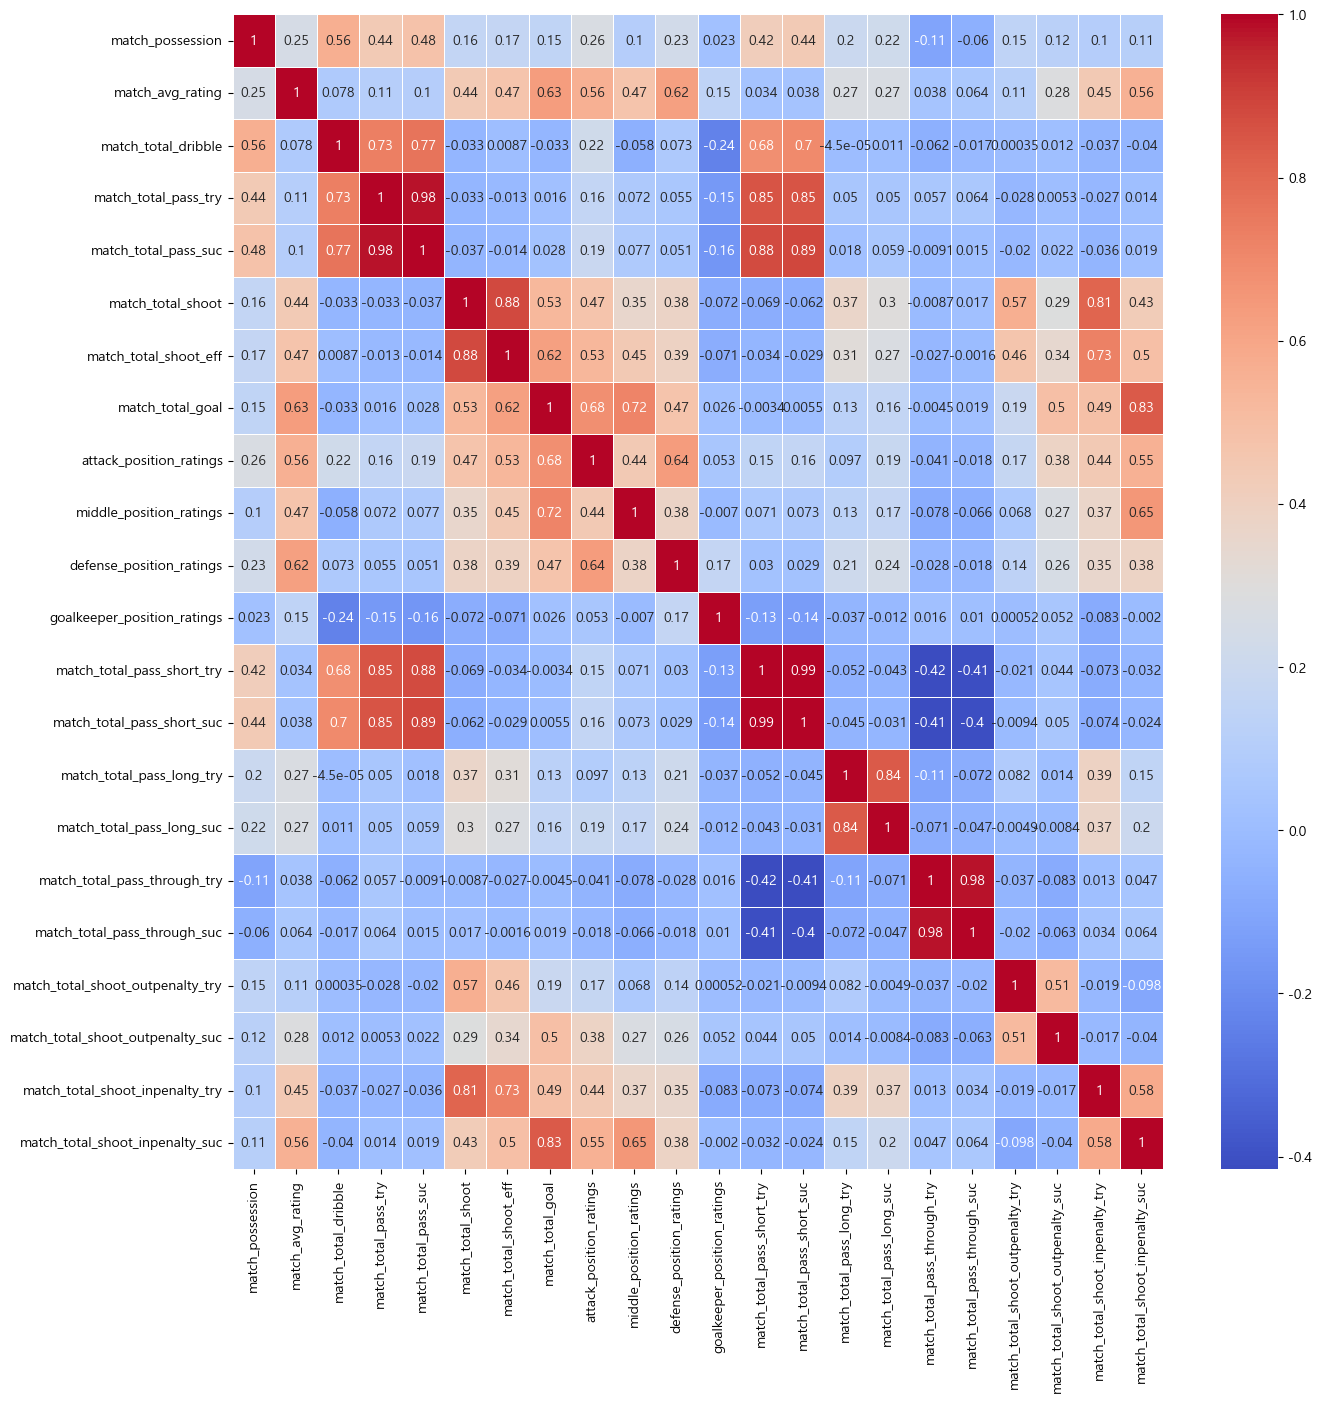

In [18]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df1_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [19]:
threshold = 0.8
corr_matrix = df1_temp.corr()

strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    
    .stack()    
    .reset_index()  
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                       Variable 1                       Variable 2  \
60           match_total_pass_try             match_total_pass_suc   
68           match_total_pass_try       match_total_pass_short_try   
69           match_total_pass_try       match_total_pass_short_suc   
85           match_total_pass_suc       match_total_pass_short_try   
86           match_total_pass_suc       match_total_pass_short_suc   
95              match_total_shoot            match_total_shoot_eff   
109             match_total_shoot  match_total_shoot_inpenalty_try   
139              match_total_goal  match_total_shoot_inpenalty_suc   
186    match_total_pass_short_try       match_total_pass_short_suc   
203     match_total_pass_long_try        match_total_pass_long_suc   
216  match_total_pass_through_try     match_total_pass_through_suc   

     Correlation  
60      0.982903  
68      0.853401  
69      0.852972  
85      0.877050  
86      0.887905  
95      0.879926  
109     0.807943  
139    

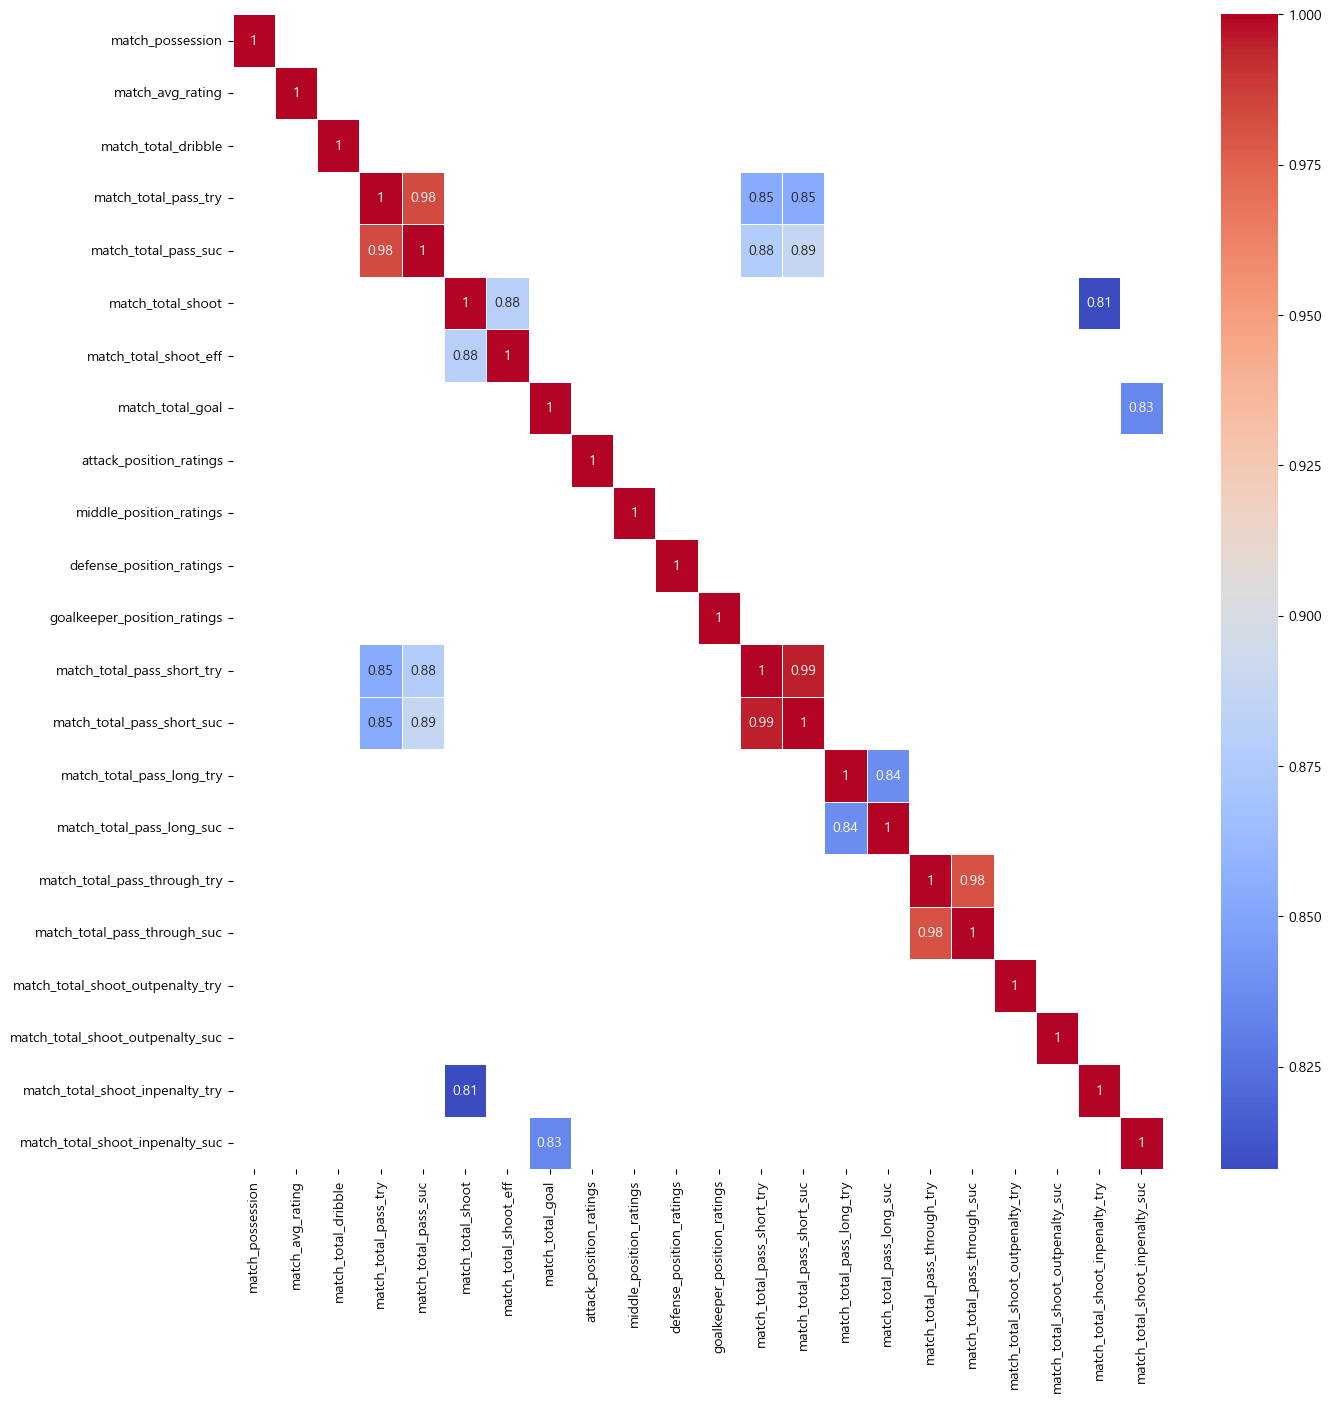

In [20]:
mask = np.abs(corr_matrix) <= threshold  

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, cmap = 'coolwarm', ax = ax)
plt.show()

### 변수 제거 후 상관계수 및 VIF 확인

In [21]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Removal Based on VIF Threshold
def calculate_vif_(X, thresh = 10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped = True
    
    while dropped:
        dropped = False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"Dropping '{X[cols[variables]].columns[maxloc]}' at index {maxloc}")
            variables = np.delete(variables, maxloc)
            dropped = True

    if len(variables) == 0:
        print("All variables were removed. No remaining variables.")
        return pd.DataFrame() 

    print("Remaining variables:")
    print(X.columns[variables])
    return X[cols[variables]]

df2_temp = calculate_vif_(df1_temp)

# df2_temp = df1_temp.drop(columns = ['match_avg_rating', 
#                           'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
#                           'match_total_shoot', 'match_total_shoot_eff', 
#                           'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
#                           'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc']
#                            + position_ratings_col)

Dropping 'match_total_pass_suc' at index 4
Dropping 'match_total_shoot' at index 4
Dropping 'match_total_pass_short_try' at index 10
Dropping 'match_total_pass_try' at index 3
Dropping 'defense_position_ratings' at index 7
Dropping 'match_avg_rating' at index 1
Dropping 'match_total_pass_through_suc' at index 11
Dropping 'attack_position_ratings' at index 4
Dropping 'match_total_goal' at index 3
Dropping 'match_possession' at index 0
Dropping 'middle_position_ratings' at index 2
Dropping 'match_total_dribble' at index 0
Dropping 'match_total_shoot_eff' at index 0
Dropping 'goalkeeper_position_ratings' at index 0
Dropping 'match_total_pass_long_try' at index 1
Remaining variables:
Index(['match_total_pass_short_suc', 'match_total_pass_long_suc',
       'match_total_pass_through_try', 'match_total_shoot_outpenalty_try',
       'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_try',
       'match_total_shoot_inpenalty_suc'],
      dtype='object')


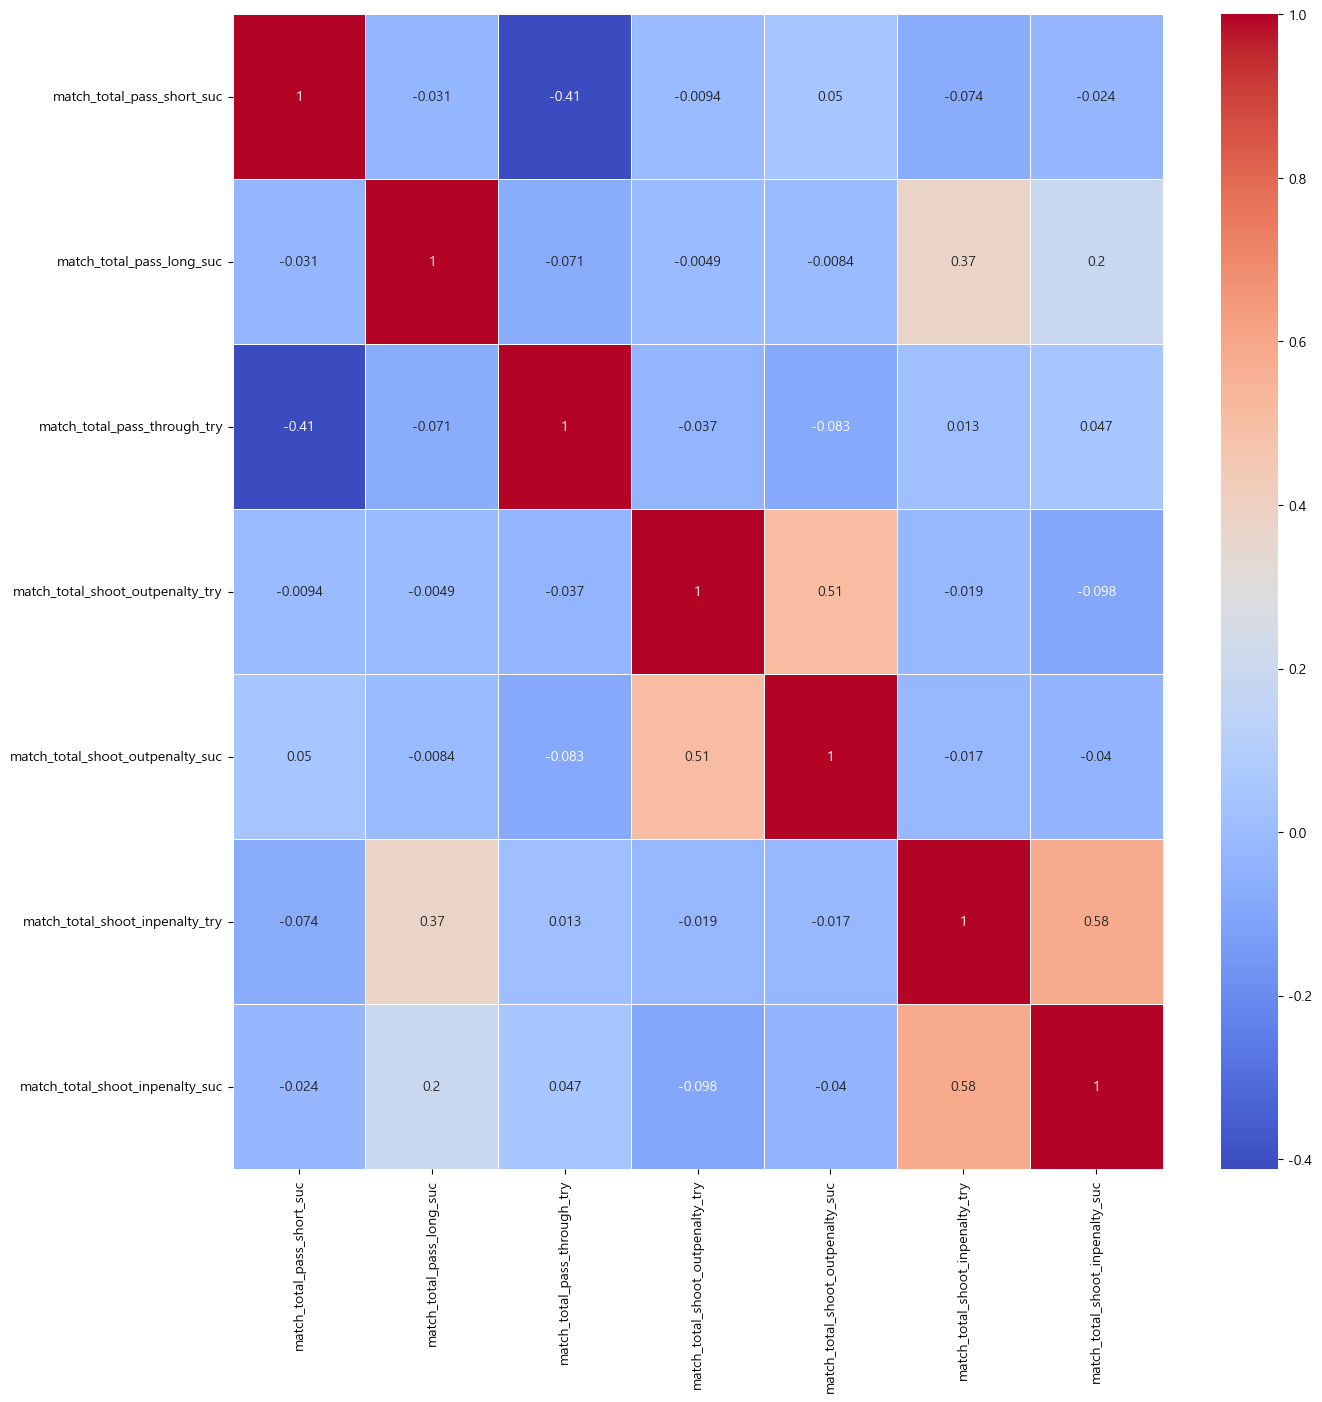

In [22]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df2_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [23]:
threshold = 0.7
corr_matrix = df2_temp.corr()
strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))  
    .stack()   
    .reset_index()    
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

vif_data = calculate_vif(df2_temp)
vif_data

Variable       VIF
0        match_total_pass_short_suc  4.440912
1         match_total_pass_long_suc  2.801905
2      match_total_pass_through_try  3.490217
3  match_total_shoot_outpenalty_try  3.446458
4  match_total_shoot_outpenalty_suc  1.829678
5   match_total_shoot_inpenalty_try  7.524495
6   match_total_shoot_inpenalty_suc  4.651584

---

---

In [25]:
basic_col = ['match_possession', 
             'match_avg_rating', 
             'match_total_dribble', 
             'match_total_goal', 
             'match_total_shoot', 
             'match_total_pass_suc']

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

pass_col = ['match_total_pass_try', 
            'match_total_pass_suc',    
            'match_total_pass_short_try',
            'match_total_pass_short_suc', 
            'match_total_pass_long_try',
            'match_total_pass_long_suc', 
            'match_total_pass_through_try', 
            'match_total_pass_through_suc']

shoot_col = ['match_total_shoot', 
             'match_total_shoot_eff', 
             'match_total_shoot_outpenalty_try', 
             'match_total_shoot_outpenalty_suc', 
             'match_total_shoot_inpenalty_try', 
             'match_total_shoot_inpenalty_suc']

In [26]:
df3 = df1.copy()

df1_win_query = "SELECT * FROM match_user WHERE match_result = '승'"
df3_win = pd.read_sql(df1_win_query, con = engine)

df3_draw_query = "SELECT * FROM match_user WHERE match_result = '무'"
df3_draw = pd.read_sql(df3_draw_query, con = engine)

df3_lose_query = "SELECT * FROM match_user WHERE match_result = '패'"
df3_lose = pd.read_sql(df3_lose_query, con = engine)

2024-12-30 22:07:36,229 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-30 22:07:36,230 INFO sqlalchemy.engine.Engine [cached since 924.8s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '승'"}
2024-12-30 22:07:36,233 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '승'
2024-12-30 22:07:36,233 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-30 22:07:36,242 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-30 22:07:36,244 INFO sqlalchemy.engine.Engine [cached since 924.8s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '무'"}
2024-12-30 22:07:36,245 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '무'
2024-12-30 22:07:36,2

In [27]:
df3_win

match_id                         user_ouid user_nickname  \
0    6770ca467705eaf9e115599b  198f4cf7dec8af391eb48ed4a8a30533        근사한트롤3   
1    6770ca473bd889390bbf818e  697b36885d2d984e2e808de53401de8a          냥냥댕댕   
2    6770ca4754c99dc9780d870b  4bfdd3bc98695f1af5cc8c57cfde75dc          난히덩크   
3    6770ca477202c8b273d3d6d5  8639a23405e6a43fa189587721d793b1       HONGSIE   
4    6770ca47ccb3e5542215a430  55876433d0e7173b882e7e274b772196         노랑색훈이   
..                        ...                               ...           ...   
191  6772603770b4009c4ba37764  b08a8cde39b8f904e830fd3ab2e75d8c       거울보니김우빈   
192  67726037b482e9ac28e889e1  ecc17b73d9daa6397a4f171290b5d614        91TOTY   
193  67726037c989fc7cf5c002d3  c9f2ec11e944249f25de1303a79fe90a         맨유김인직   
194  67726037d2c061f9126e9c37  bf186841f1148bfa0fccf329935ce95a           빡투빡   
195  67726037dd6ede8d42008532  e5995a41d26d415bdd2ad33f896c0342          흐응니애   

    match_result  match_endtype  match_possession  match_avg_rating  \
0              승              0                75           4.64444   
1              승              1                58           4.20000   
2              승              0                55           4.43333   
3              승              1                51           4.40000   
4              승              0                49           4.18333   
..           ...            ...               ...               ...   
191            승              0                52           4.50000   
192            승              0                47           4.67778   
193            승              1                57           4.66111   
194            승              1                55           4.78889   
195            승              0                54           4.87222   

     match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                     64                    91                    83  ...   
1                     35                    59                    55  ...   
2                     55                    75                    63  ...   
3                     28                    34                    27  ...   
4                     73                   105                    95  ...   
..                   ...                   ...                   ...  ...   
191                   73                    87                    78  ...   
192                   38                    88                    69  ...   
193                   47                    54                    50  ...   
194                   87                   119                   109  ...   
195                   67                   102                    91  ...   

     match_total_pass_short_try  match_total_pass_short_suc  \
0                            49                          47   
1                            44                          42   
2                            33                          29   
3                            20                          17   
4                            78                          74   
..                          ...                         ...   
191                          64                          62   
192                          61                          51   
193                          40                          39   
194                          83                          80   
195                          57                          55   

     match_total_pass_long_try  match_total_pass_long_suc  \
0                           14                         10   
1                            6                          5   
2                            5                          4   
3                            4                          2   
4                            3                          2   
..                         ...                        ...   
191                          7                          3   
192                      

In [28]:
df3_draw

match_id                         user_ouid user_nickname  \
0   6770ca477d00879b1fc04dbd  75a1c9e9fad68338d41a505cdb403592           정용맘   
1   6770ca477d00879b1fc04dbd  7fb6fb2e3c049536c9d1357c80ceeca5           베르모   
2   6770ca48b43d17a6abe78471  bba4bb1fd18e328ba9fd0d2ba0fbe3e3           셭트업   
3   6770ca48b43d17a6abe78471  d5da9f6b550b4cd7ad78403e646571d0       FC노장의투혼   
4   6770ca4a6b8a0c835b4a8235  458e0c369b22c2fe58c3d76db8ce2bfd         슛돌이조던   
..                       ...                               ...           ...   
59  677260364b94864abc312ec0  bfe9f992a71a68c6f2d1e394712dd95a           씨커피   
60  677260373eed5f467dcbde33  5c8c6eb43346b0f05cb30b7cd7b4dc58      긍정적으로살아가   
61  677260373eed5f467dcbde33  bf23936209bc6307bfa7ccb1208f6db2         발리세로나   
62  67726037d55d7f03830f79a1  94e5f243533b06db9d30b76ad72a4a0c           맞을래   
63  67726037d55d7f03830f79a1  d3fc7b9e91f973ae997b6c2e153e2d52           갈춘태   

   match_result  match_endtype  match_possession  match_avg_rating  \
0             무              0                53           4.11667   
1             무              0                47           5.21111   
2             무              0                52           4.08333   
3             무              0                48           4.21111   
4             무              0                49           4.21111   
..          ...            ...               ...               ...   
59            무              0                49           4.13333   
60            무              0                40           3.92222   
61            무              0                60           4.21667   
62            무              0                54           4.09444   
63            무              0                46           4.05000   

    match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                    71                   109                    96  ...   
1                    62                    95                    86  ...   
2                    77                    97                    85  ...   
3                    50                    76                    67  ...   
4                    67                   106                    90  ...   
..                  ...                   ...                   ...  ...   
59                   65                    76                    67  ...   
60                   50                    73                    60  ...   
61                   97                   125                   114  ...   
62                   65                   128                   113  ...   
63                   79                   100                    90  ...   

    match_total_pass_short_try  match_total_pass_short_suc  \
0                           85                          80   
1                           67                          64   
2                           65                          64   
3                           37                          35   
4                           76                          66   
..                         ...                         ...   
59                          51                          48   
60                          36                          33   
61                          94                          89   
62                          88                          81   
63                          71                          64   

    match_total_pass_long_try  match_total_pass_long_suc  \
0                           7                          3   
1                           8                          6   
2                          15                          8   
3                           6                          5   
4                           2                          1   
..                        ...                        ...   
59                          5                          3   
60                          5                          4   
61                  

In [29]:
df3_lose

match_id                         user_ouid user_nickname  \
0    6770ca4754c99dc9780d870b  e46c0a63ae73d487734c8e3412dd260b        이스라엘만세   
1    6770ca477202c8b273d3d6d5  453f7fba272abb57cab08851980b1565         임모벌레요   
2    6770ca47ccb3e5542215a430  41b0515ab81b0872960adc4cc6aa1c3b      흥민형팬티속내손   
3    6770ca4850e96ba4e2b78d18  00e17418c19e6b5dc9741b961173590d       귀신잡는즐라탄   
4    6770ca4861fc0e4a3e915dda  4203f6ea50759e3ef15c482345a6b6d9        내꼬꼬는커요   
..                        ...                               ...           ...   
178  6772603770b4009c4ba37764  2604bcd757e6f4c2fe30dfc5d92ec0de       스턴트배우인직   
179  67726037b482e9ac28e889e1  2b3567a4b398fa12513c1c7ddaa247b1        97seop   
180  67726037c989fc7cf5c002d3  7edf5350a608523a61a169b6de9dcb54         ssssv   
181  67726037d2c061f9126e9c37  d471069a13e247fe199ca37c653024fb         dim99   
182  67726037dd6ede8d42008532  76582d63bb3599251d1f8e7b4bda7ec5        마사회박준하   

    match_result  match_endtype  match_possession  match_avg_rating  \
0              패              0                45           4.06111   
1              패              2                49           3.44444   
2              패              0                51           3.93333   
3              패              0                51           3.98889   
4              패              0                51           3.49444   
..           ...            ...               ...               ...   
178            패              0                48           3.85000   
179            패              0                53           3.94444   
180            패              2                43           3.19444   
181            패              2                45           3.51667   
182            패              0                46           3.23889   

     match_total_dribble  match_total_pass_try  match_total_pass_suc  ...  \
0                     47                    89                    75  ...   
1                     27                    40                    32  ...   
2                     81                   125                   116  ...   
3                     67                   118                    97  ...   
4                     58                    72                    58  ...   
..                   ...                   ...                   ...  ...   
178                   79                   118                   109  ...   
179                   75                   120                   102  ...   
180                   31                    58                    45  ...   
181                   47                    89                    68  ...   
182                   87                   132                   115  ...   

     match_total_pass_short_try  match_total_pass_short_suc  \
0                            69                          60   
1                            26                          23   
2                            95                          92   
3                            65                          59   
4                            37                          35   
..                          ...                         ...   
178                         100                          96   
179                          87                          81   
180                          47                          40   
181                          40                          33   
182                          81                          77   

     match_total_pass_long_try  match_total_pass_long_suc  \
0                            7                          2   
1                            1                          1   
2                            7                          3   
3                            5                          4   
4                            3                          0   
..                         ...                        ...   
178                          2                          1   
179                      

---

## Stat별 HIST

In [30]:
def col_hist_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        bins = 15
        
        sns.histplot(_df[col].values, color = 'green', kde = True, ax = ax[idx], 
                     bins = bins, alpha = 0.6, stat = 'count')   
        
        ax[idx].set_title(_col_name[idx])
        ax[idx].set_xlim(0, max(7, max(_df[col])))

    plt.tight_layout()
    plt.show()

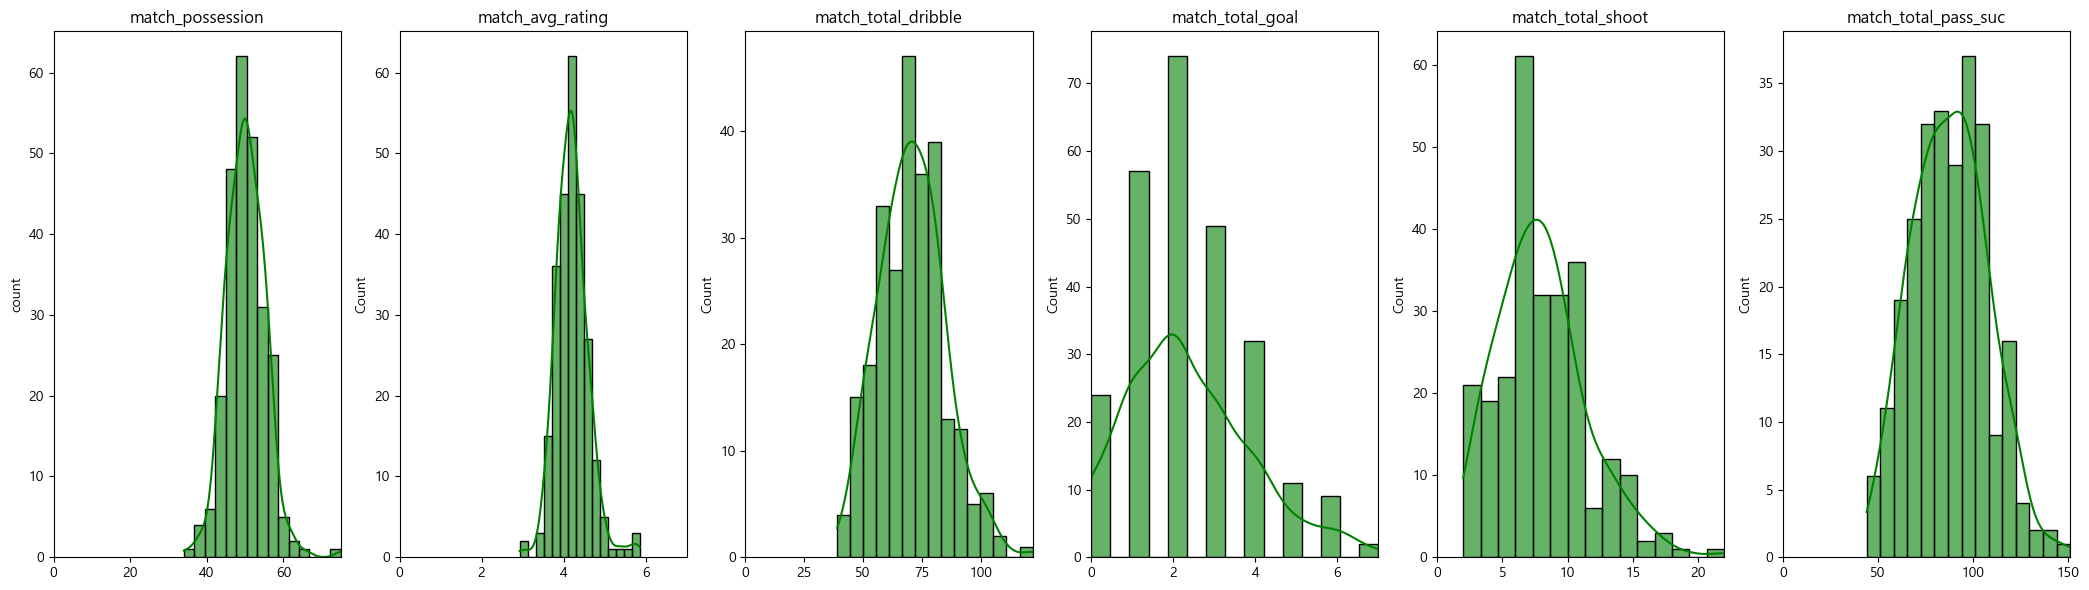

In [31]:
col_hist_all(df3, basic_col)

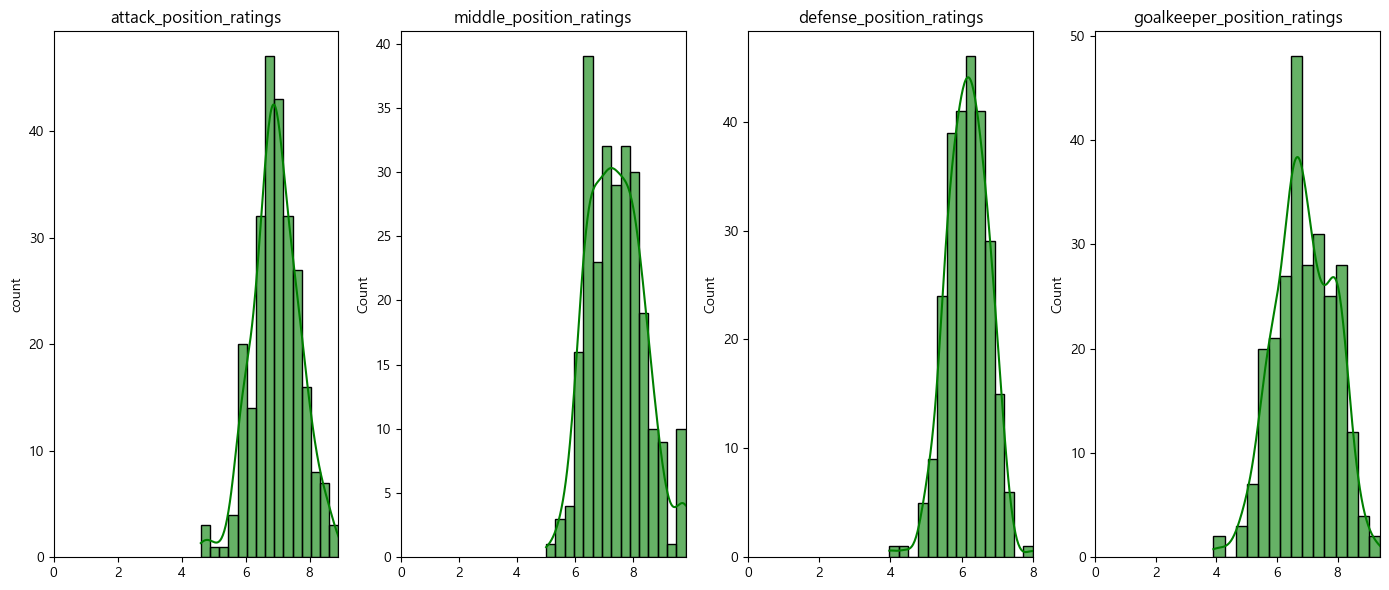

In [32]:
col_hist_all(df3, position_ratings_col)

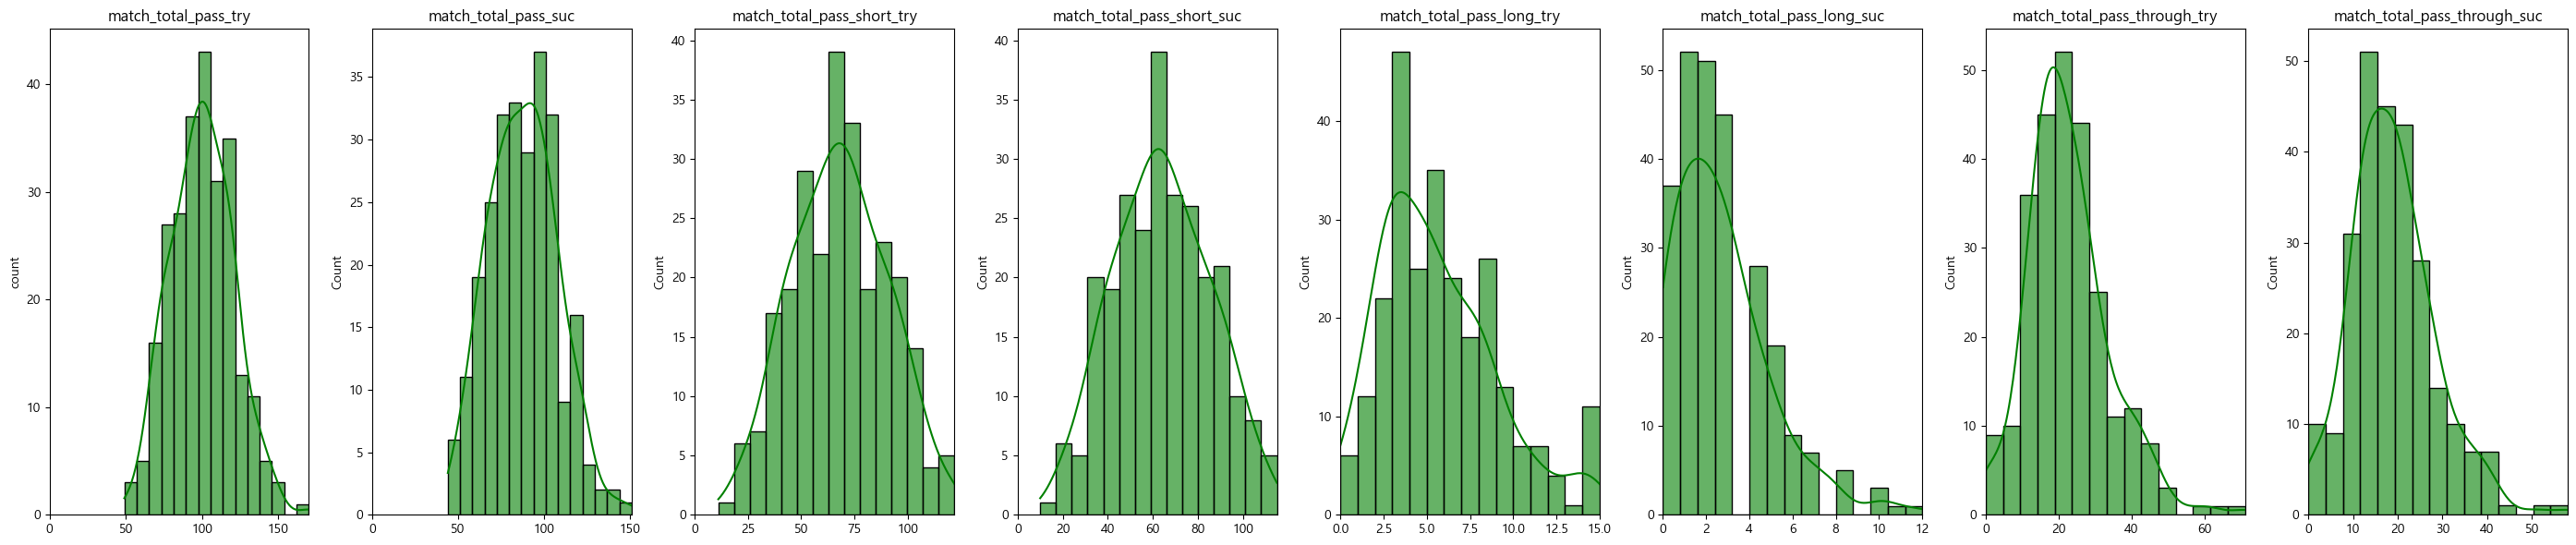

In [33]:
col_hist_all(df3, pass_col)

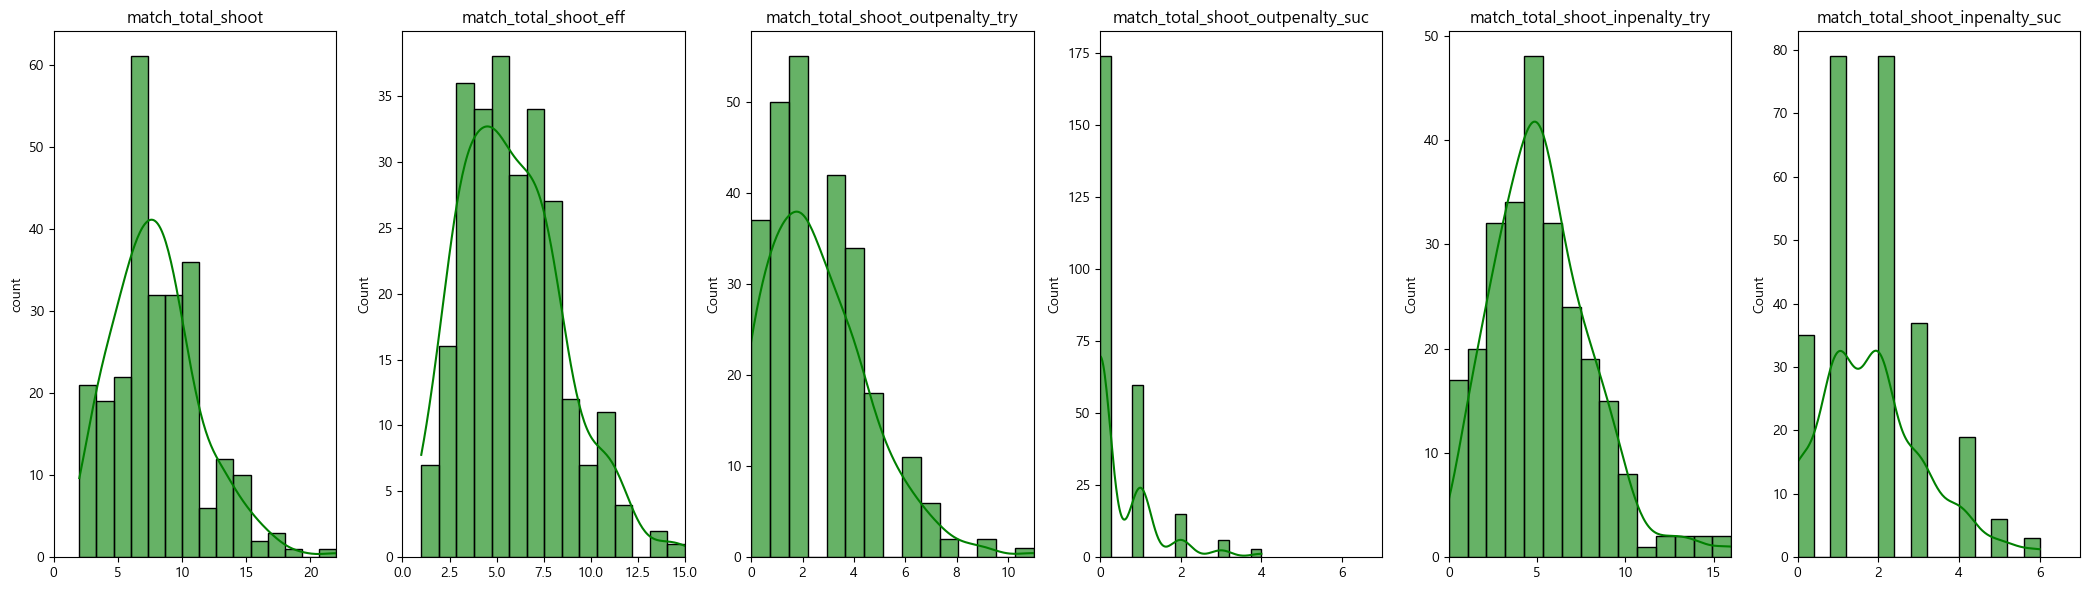

In [34]:
col_hist_all(df3, shoot_col)

---

## 승, 패에 따른 Stat별 HIST

In [35]:
def col_hist(_df_win, _df_lose, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]
        
    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        bins = 10 
        
        sns.histplot(_df_win[col].values, color = 'blue', kde = True, ax = ax[idx], label = '승', 
                     bins = bins, alpha = 0.6)
        sns.histplot(_df_lose[col].values, color = 'red', kde = True, ax = ax[idx], label = '패', 
                     bins = bins, alpha = 0.6)   
        
        ax[idx].set_title(_col_name[idx])
        ax[idx].legend()
    
    plt.tight_layout()
    plt.show()

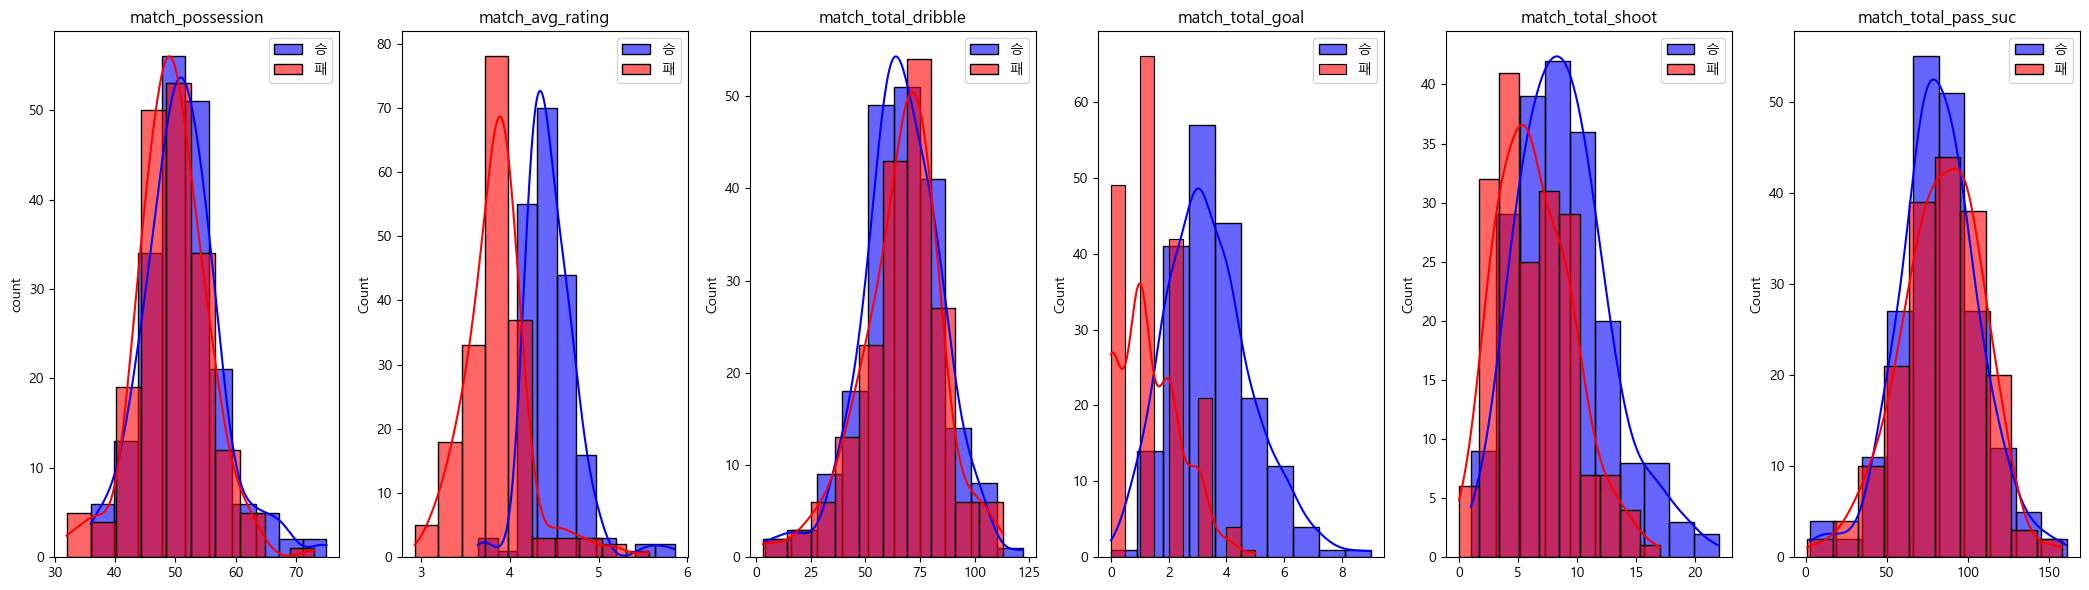

In [36]:
col_hist(df3_win, df3_lose, basic_col)

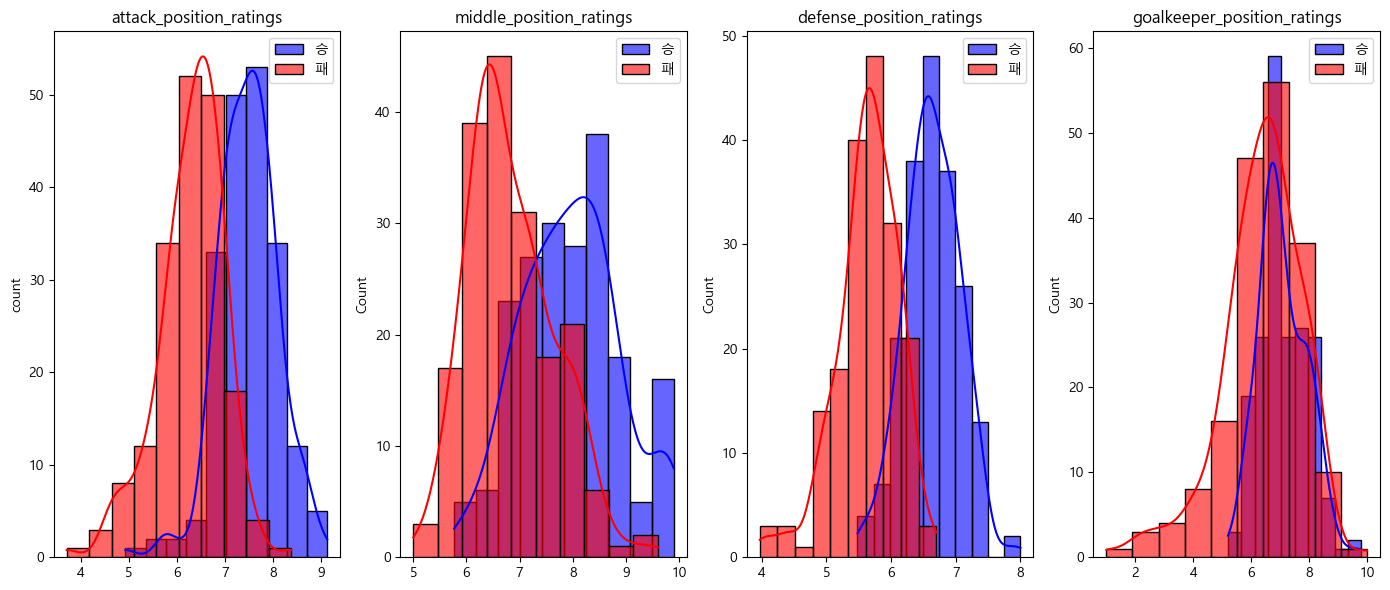

In [37]:
col_hist(df3_win, df3_lose, position_ratings_col)

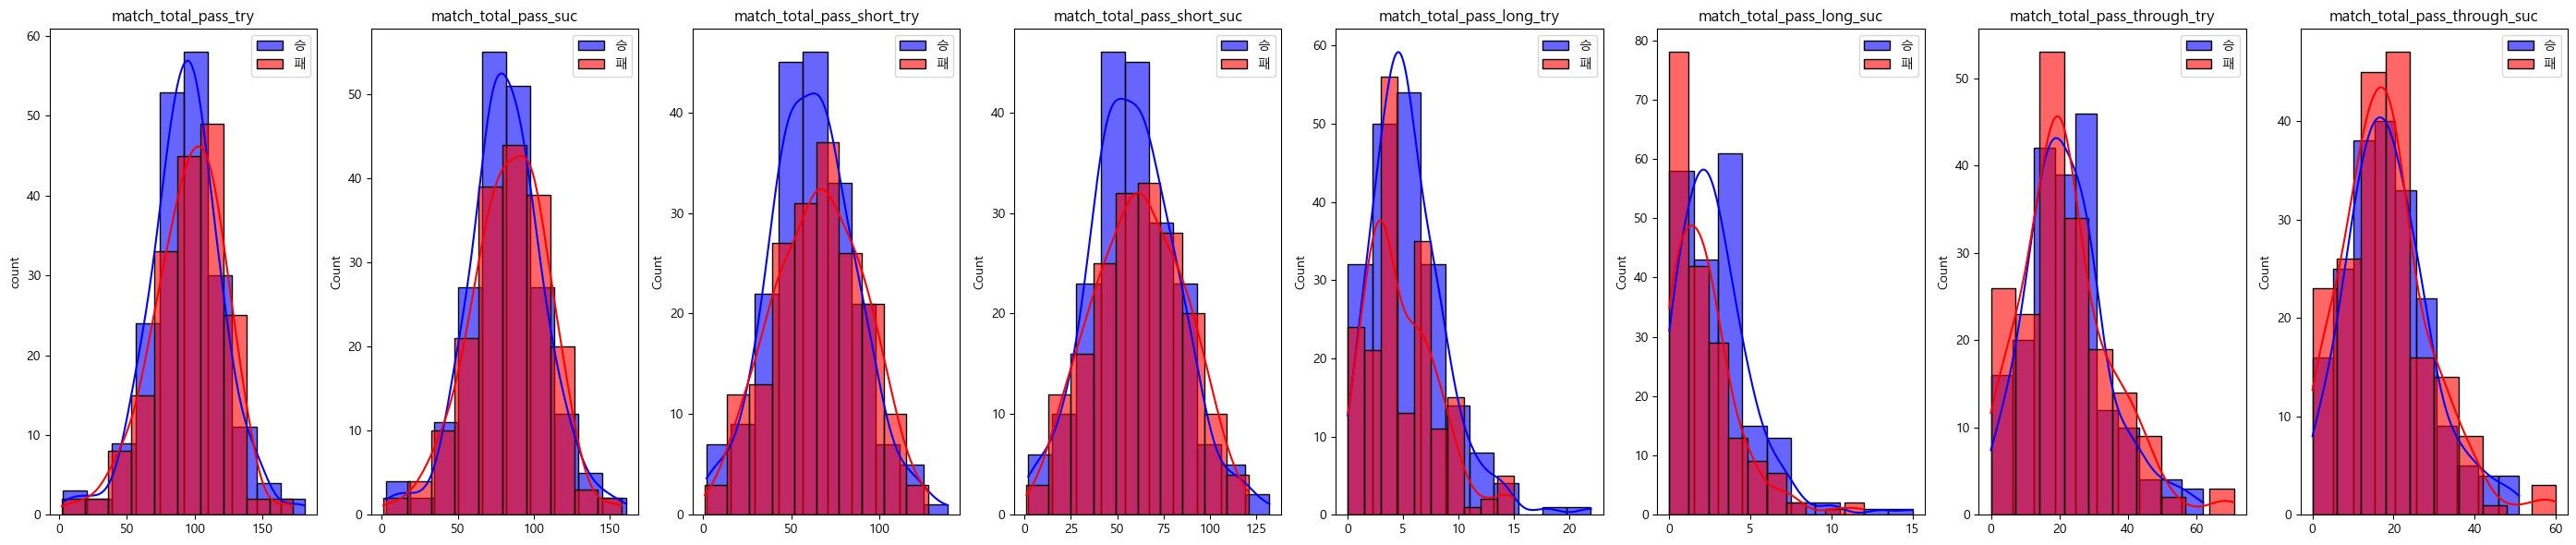

In [38]:
col_hist(df3_win, df3_lose, pass_col)

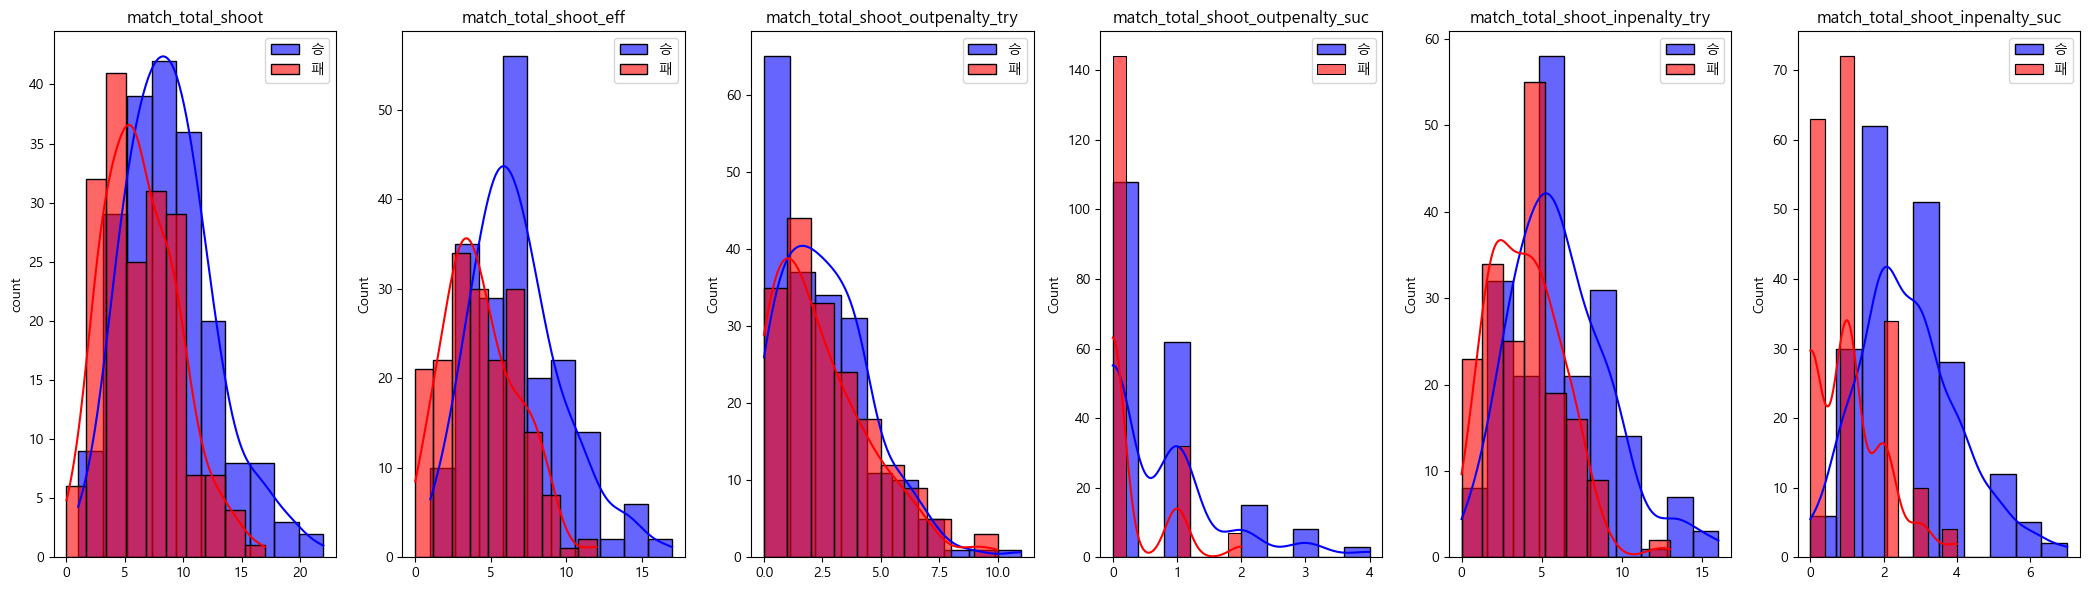

In [39]:
col_hist(df3_win, df3_lose, shoot_col)

## 경기 결과에 따른 Stat별  Box-Plot

In [40]:
def col_boxplot(_df_win, _df_lose, _col_name, _sharey_bool = False) : 

    title_list = ['승', '패']

    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6), 
                           sharey = _sharey_bool)
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        data_to_plot = [_df_win[col].values, _df_lose[col].values]
        ax[idx].boxplot(data_to_plot, tick_labels = title_list);  

        ax[idx].set_xticks([i for i in range(1, len(title_list) + 1)])
        ax[idx].set_xticklabels(title_list)

        ax[idx].set_title(_col_name[idx])

### 승, 패에 따른 Basic Stats

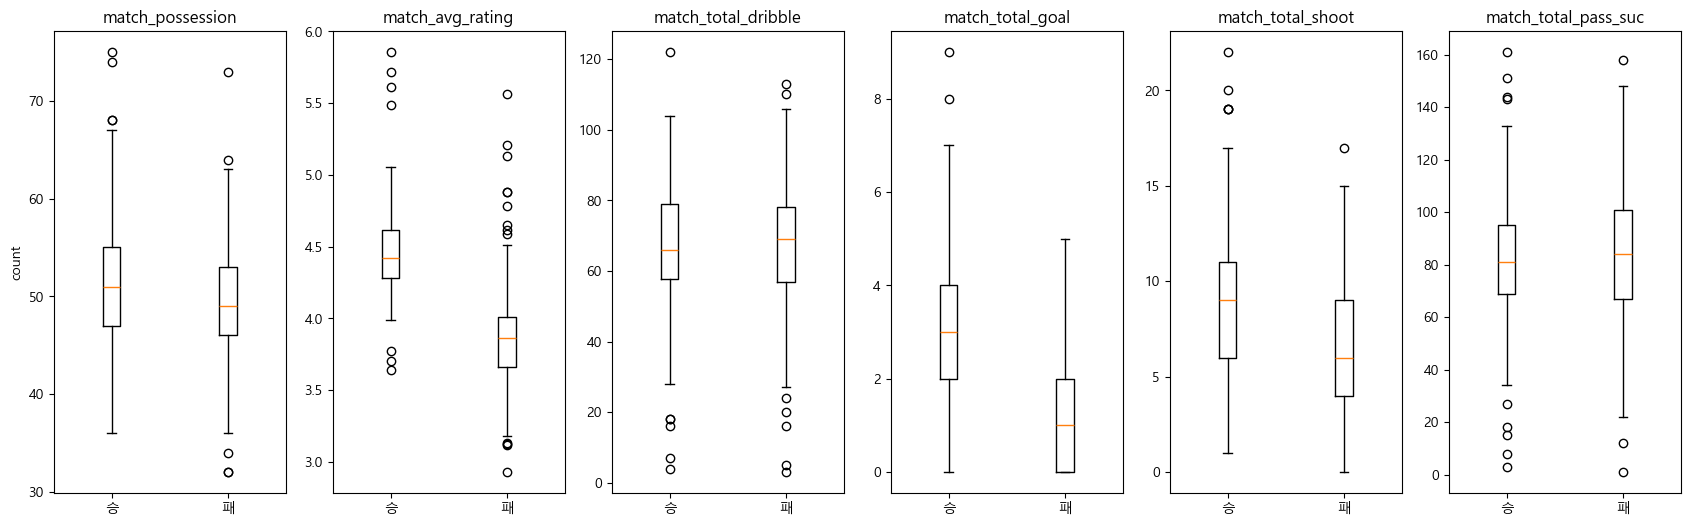

In [41]:
col_boxplot(df3_win, df3_lose, basic_col)

### 승, 패에  따른 Position 별 Ratings

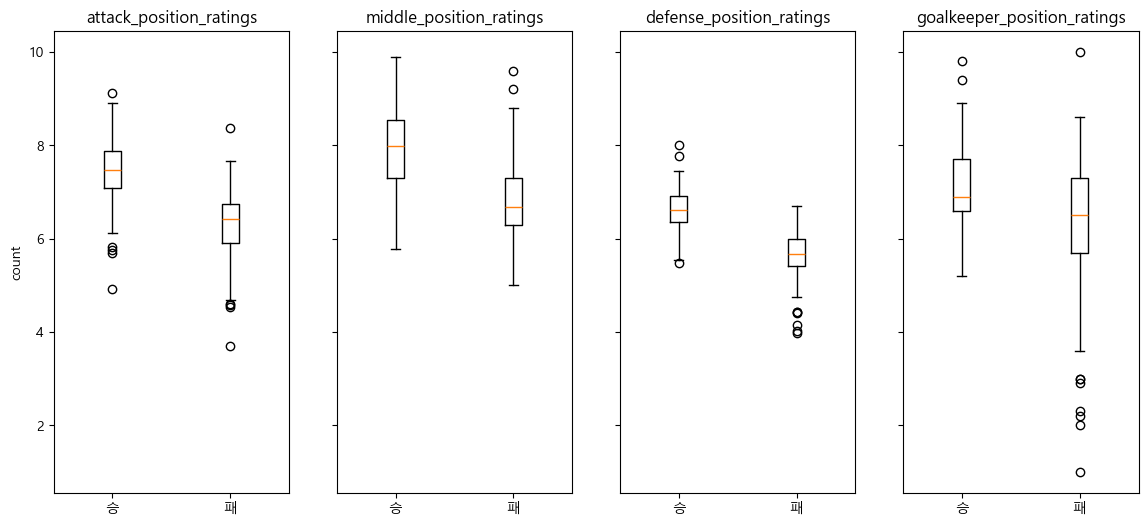

In [42]:
col_boxplot(df3_win, df3_lose, position_ratings_col, True)

### 승, 패에 따른 Pass stats

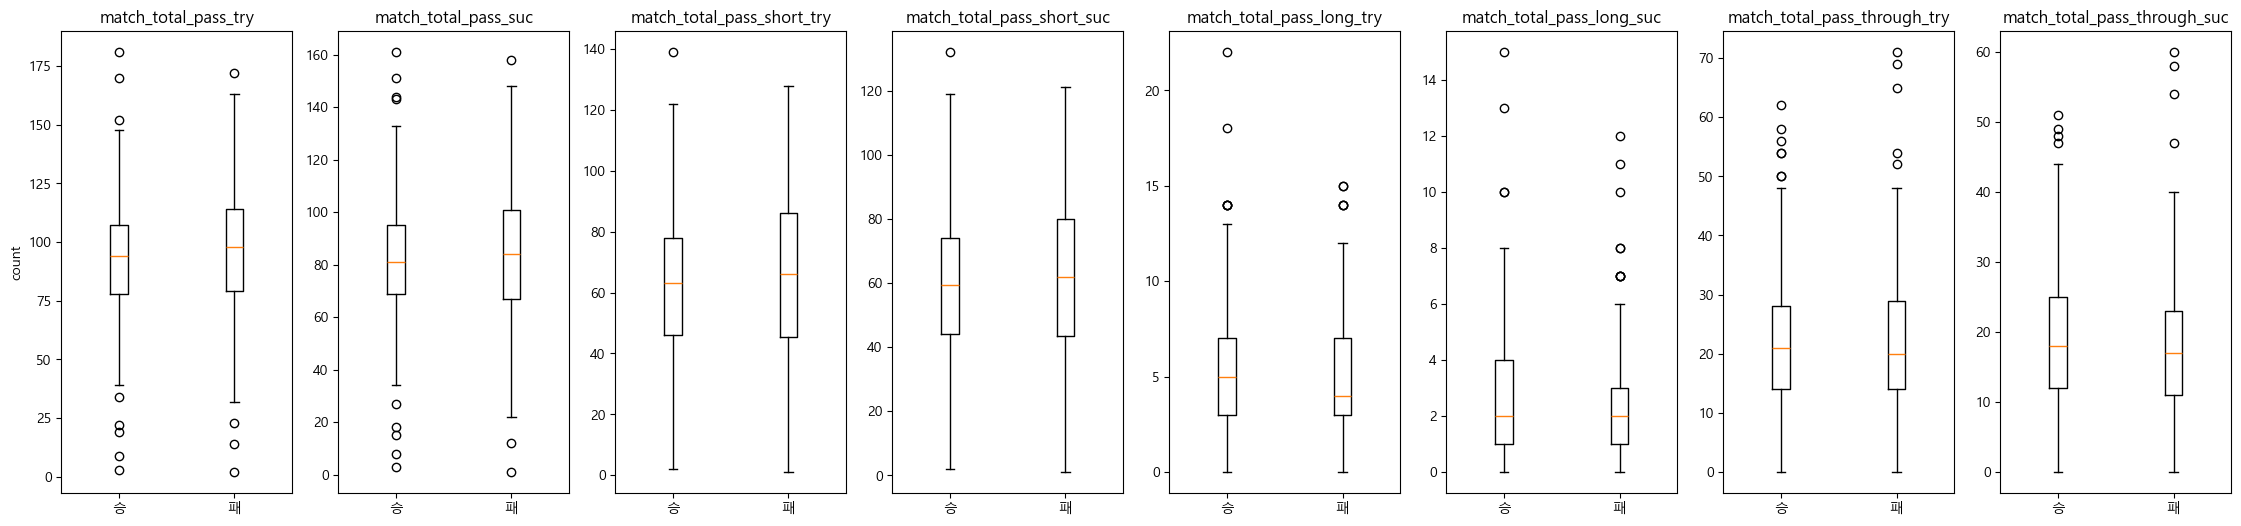

In [43]:
col_boxplot(df3_win, df3_lose, pass_col)

### 승, 패에 따른 Shoot stats

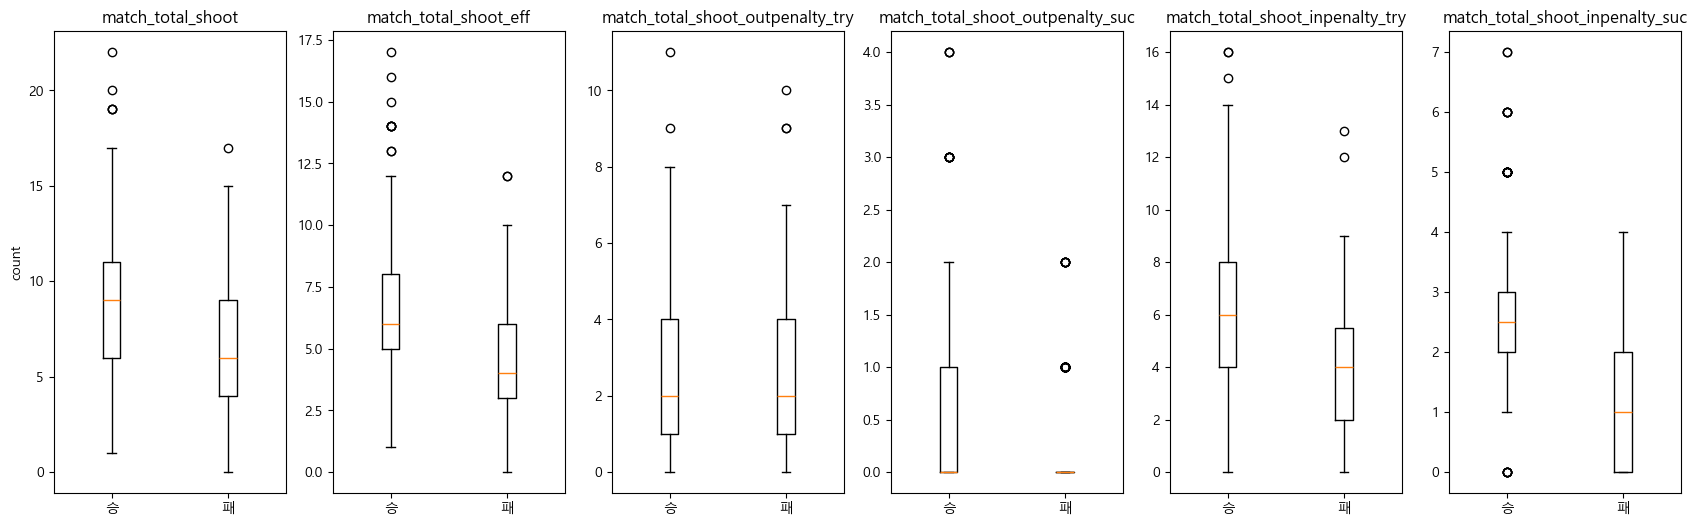

In [45]:
col_boxplot(df3_win, df3_lose, shoot_col)

---

In [46]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu, kstest, norm, probplot

from sklearn.preprocessing import power_transform

In [47]:
df3_qq = df3.copy()

## Stat별 QQ plot

In [48]:
def col_qqplot_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(_col_name):
        stats.probplot(_df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(_col_name[idx])

    plt.tight_layout()
    plt.show()

In [49]:
def col_qqplot_norm_all(_df, _col_name) : 
    fig, ax = plt.subplots(ncols = len(_col_name), 
                           figsize = (3.5 * len(_col_name), 6))
                           
    if len(_col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')
    
    for idx, col in enumerate(_col_name):
        _df[col] = power_transform(_df[col].values.reshape(-1, 1), method = 'yeo-johnson')

        stats.probplot(_df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(_col_name[idx])

    plt.tight_layout()
    plt.show()

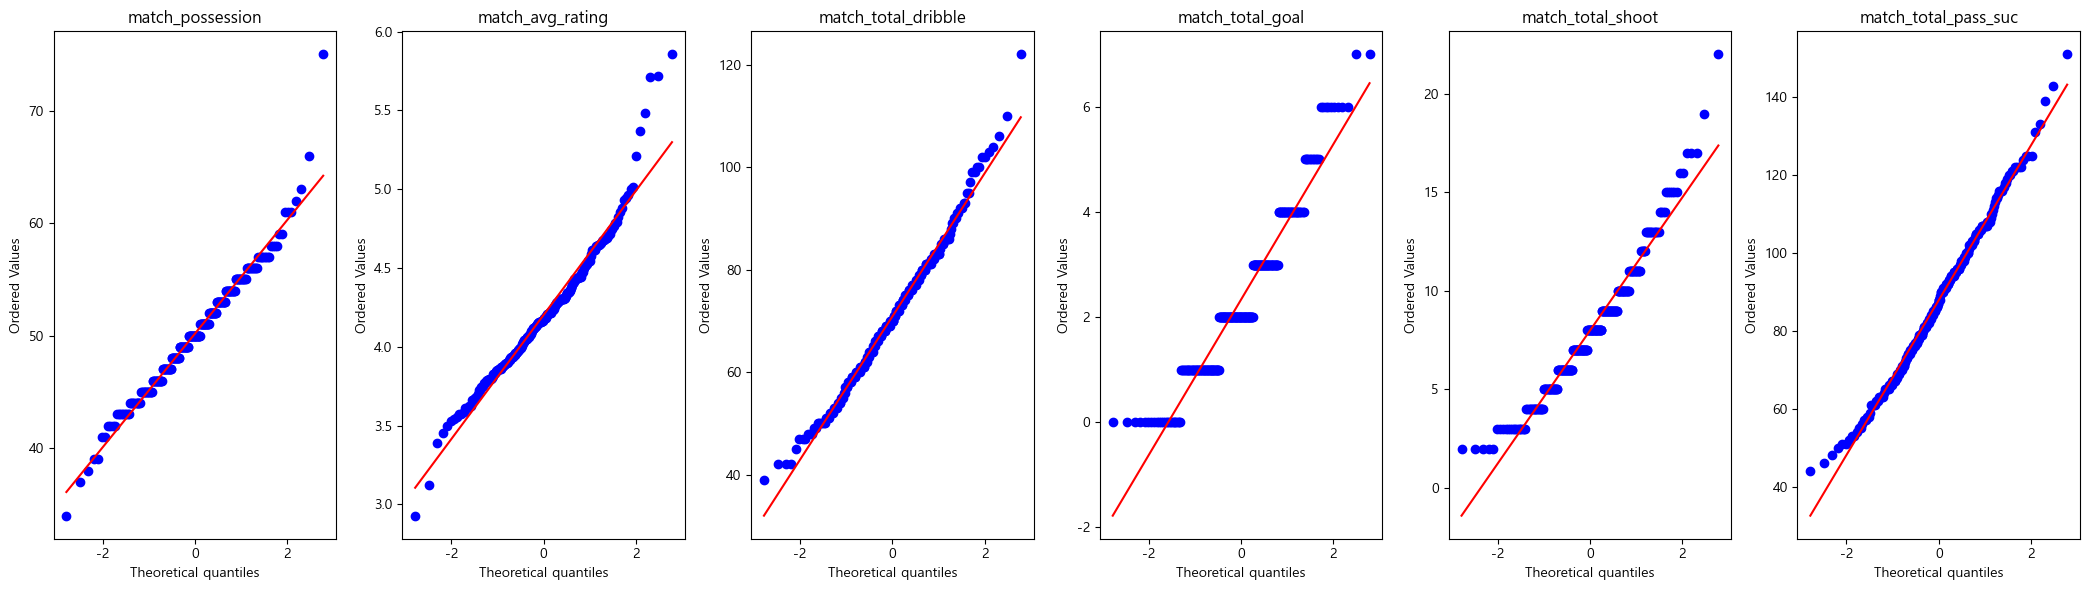

In [50]:
col_qqplot_all(df3, basic_col)

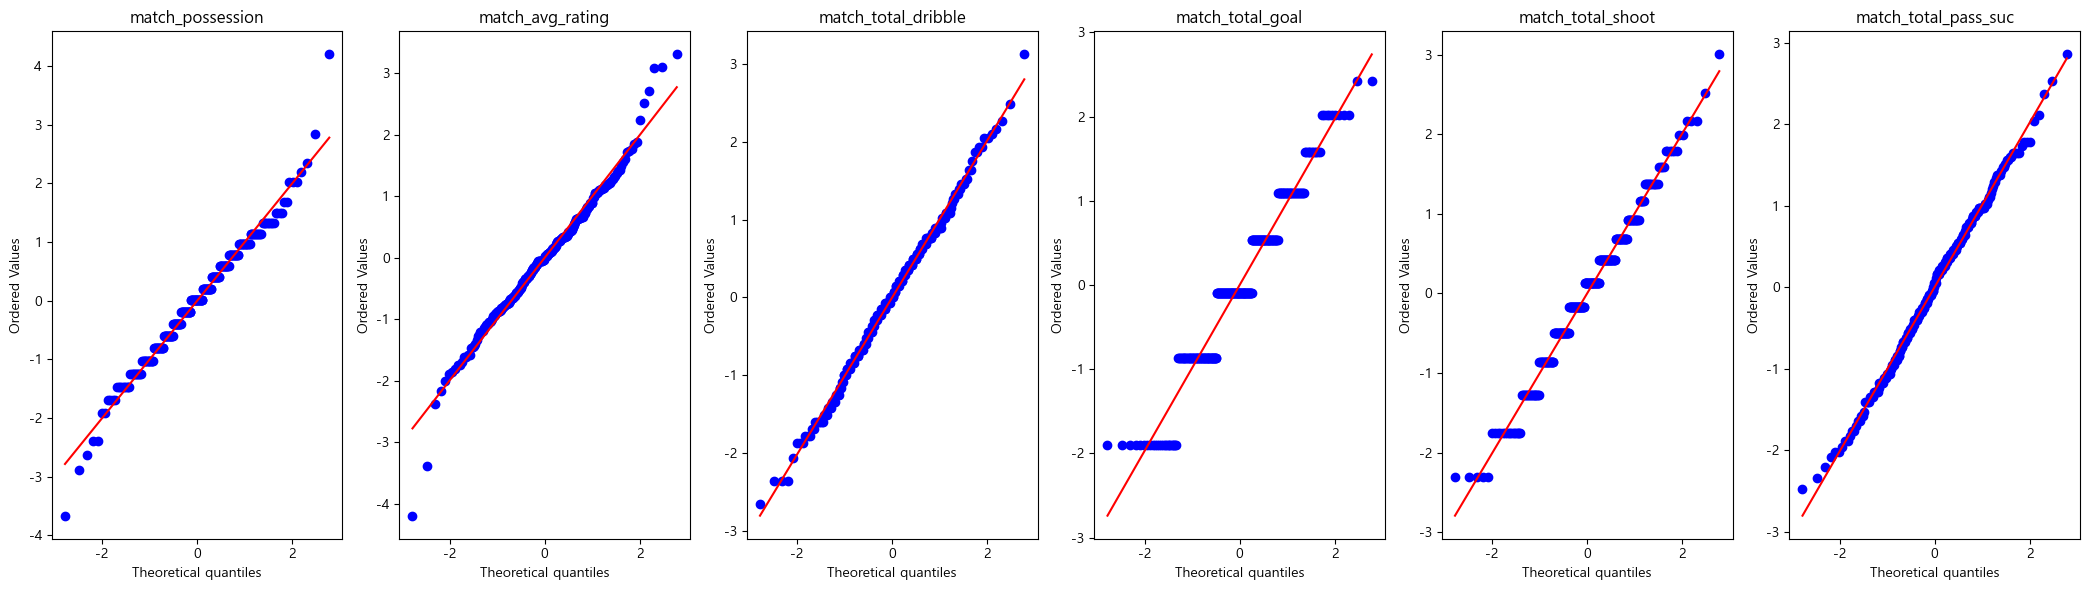

In [51]:
col_qqplot_norm_all(df3_qq, basic_col)

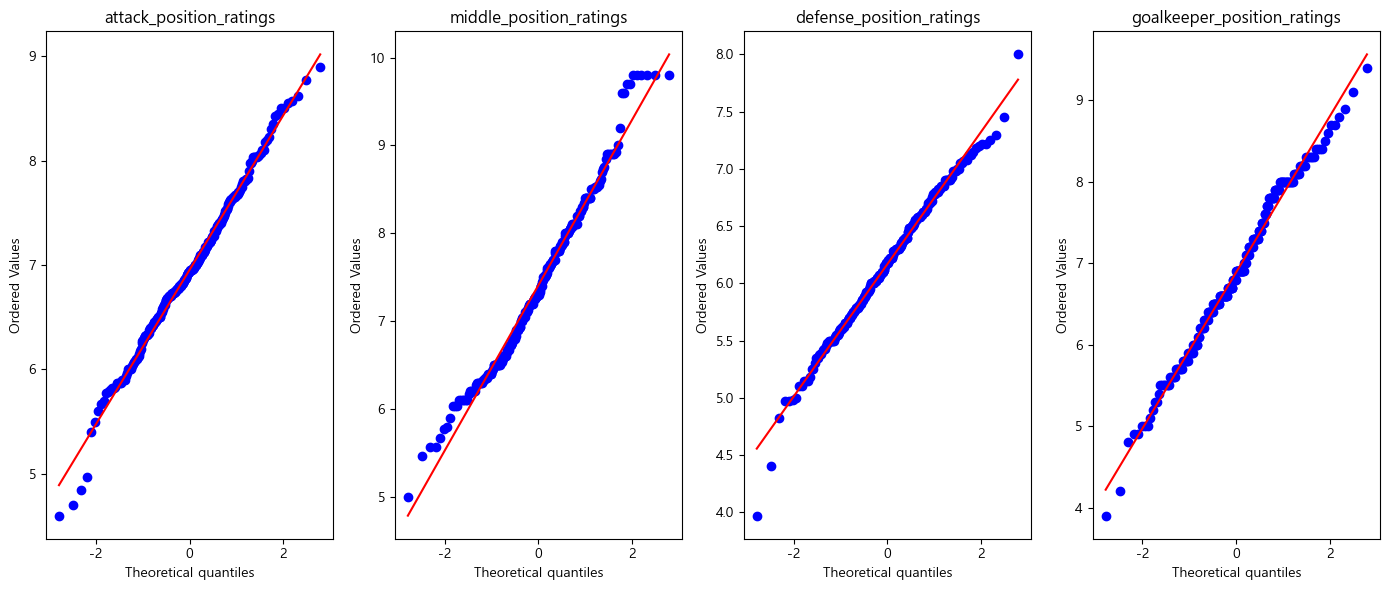

In [52]:
col_qqplot_all(df3, position_ratings_col)

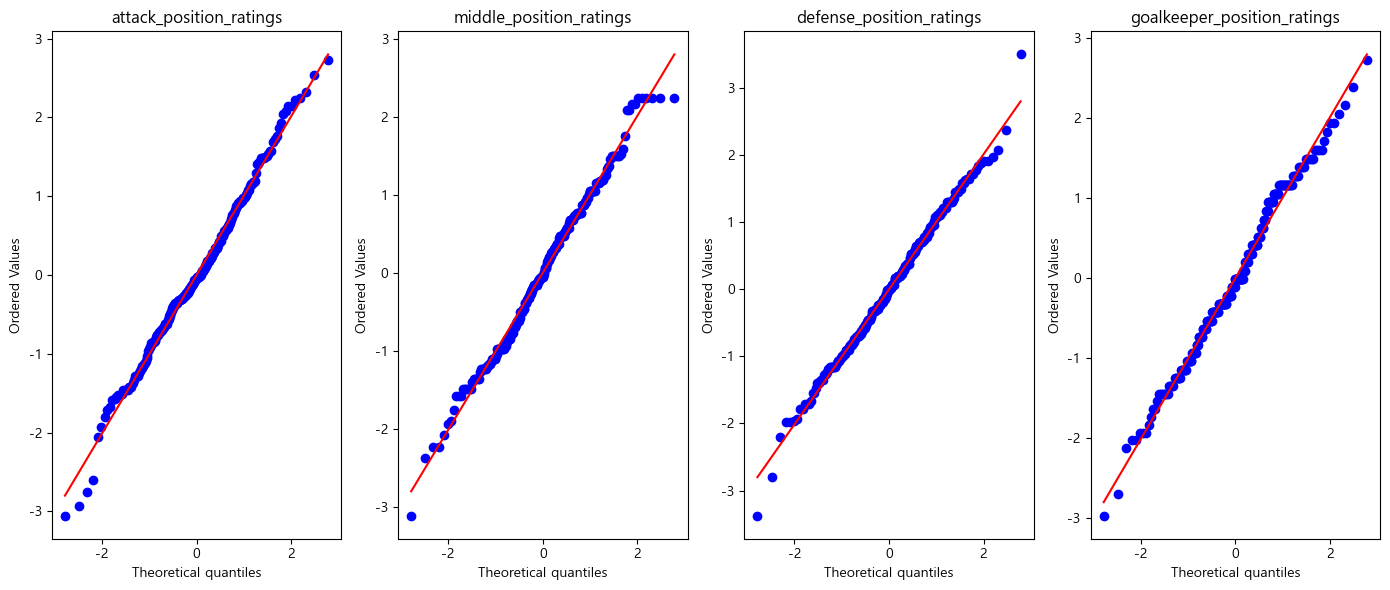

In [53]:
col_qqplot_norm_all(df3_qq, position_ratings_col)

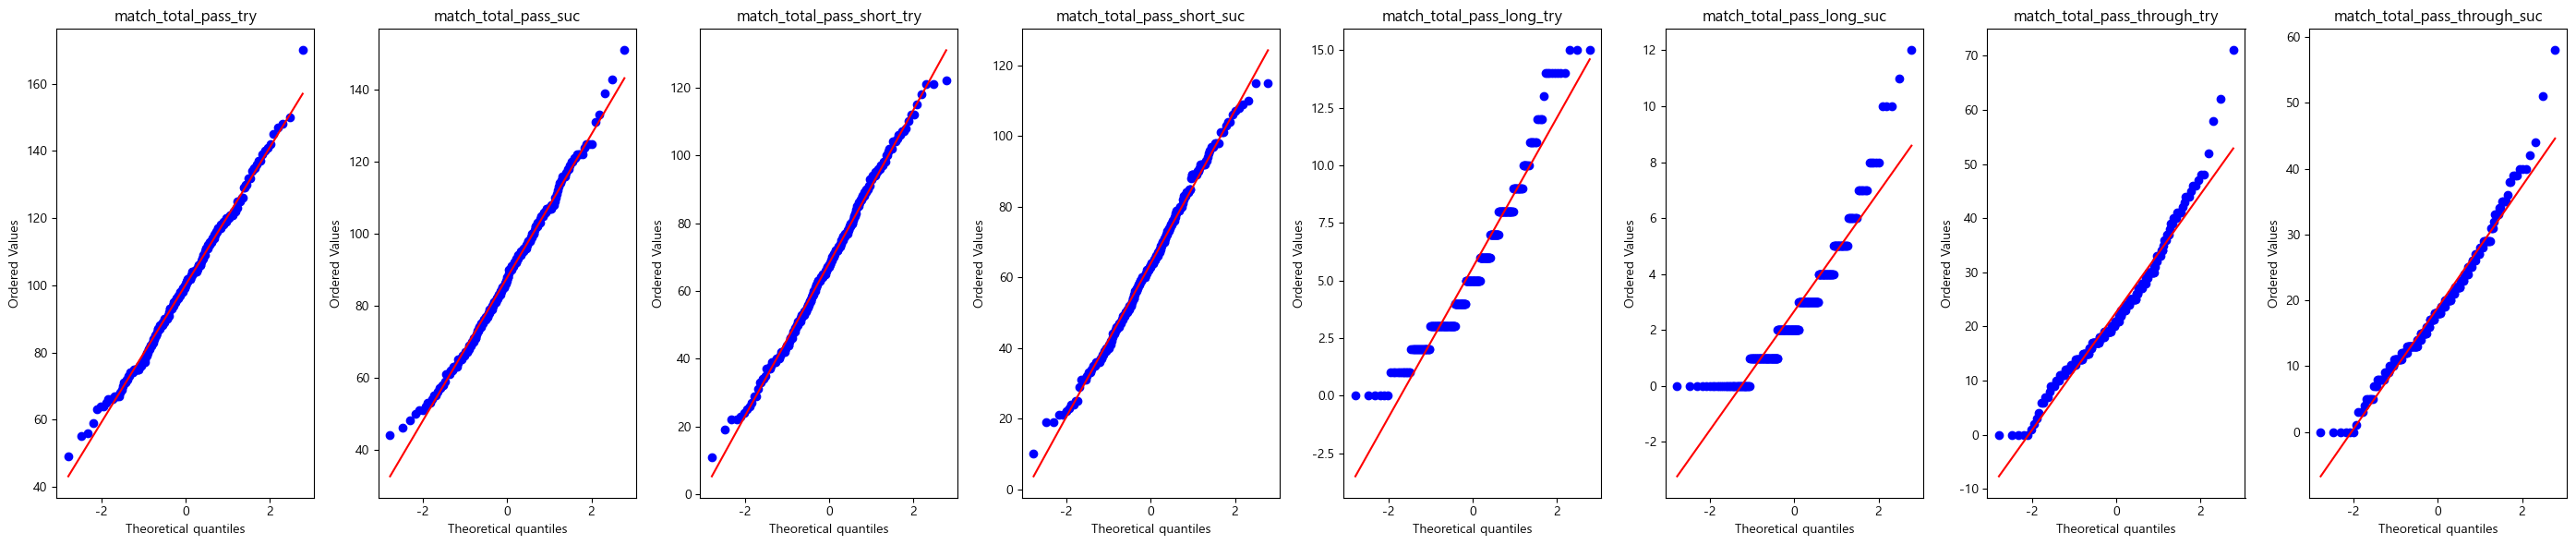

In [54]:
col_qqplot_all(df3, pass_col)

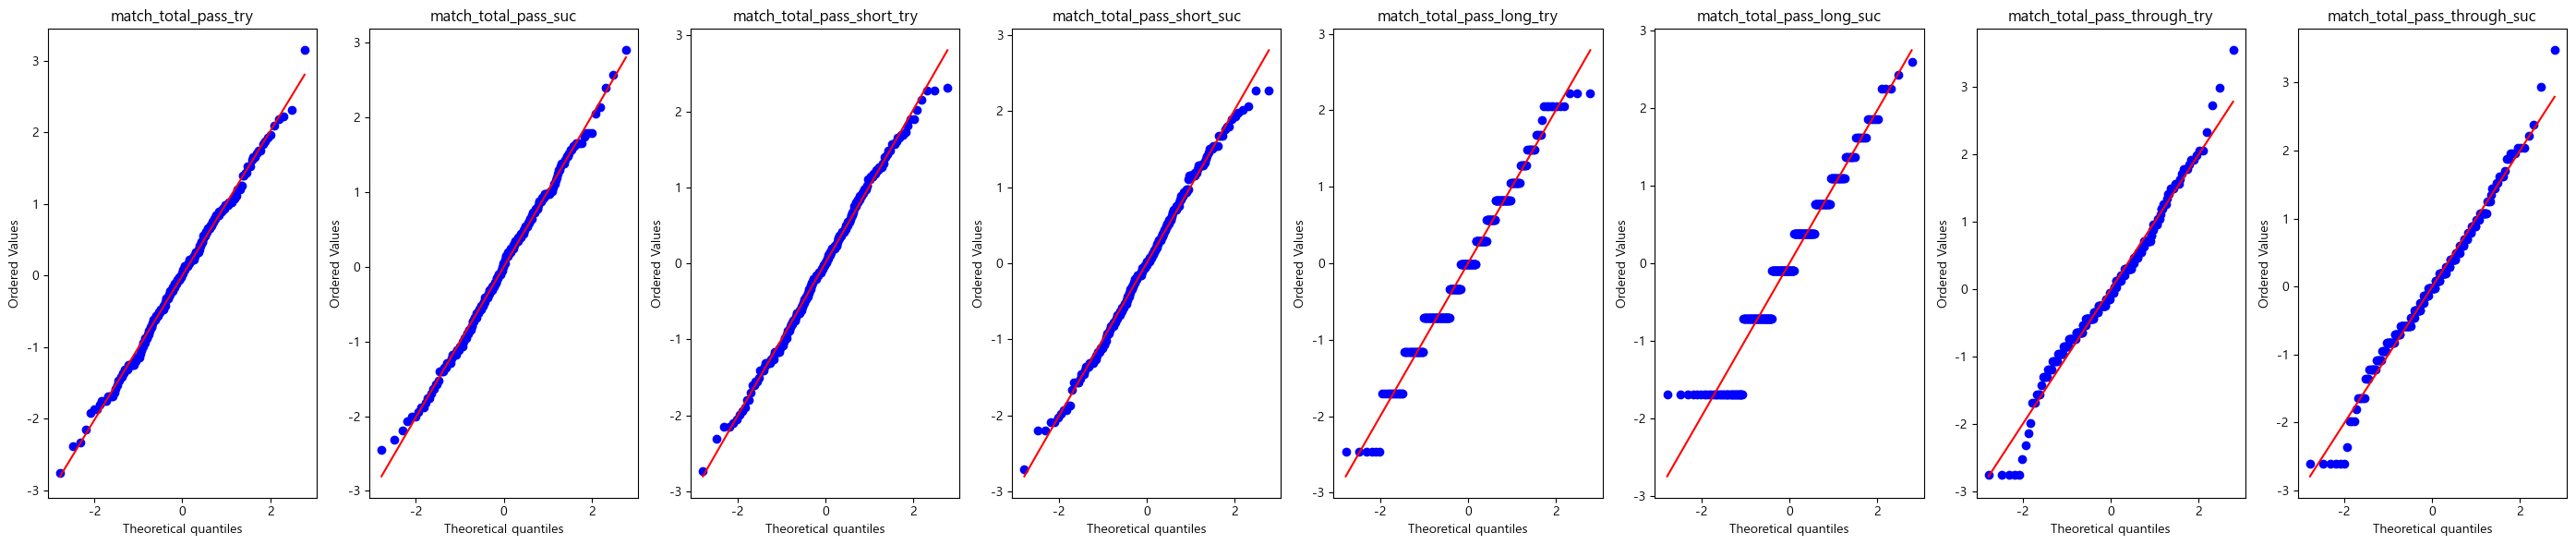

In [55]:
col_qqplot_norm_all(df3_qq, pass_col)

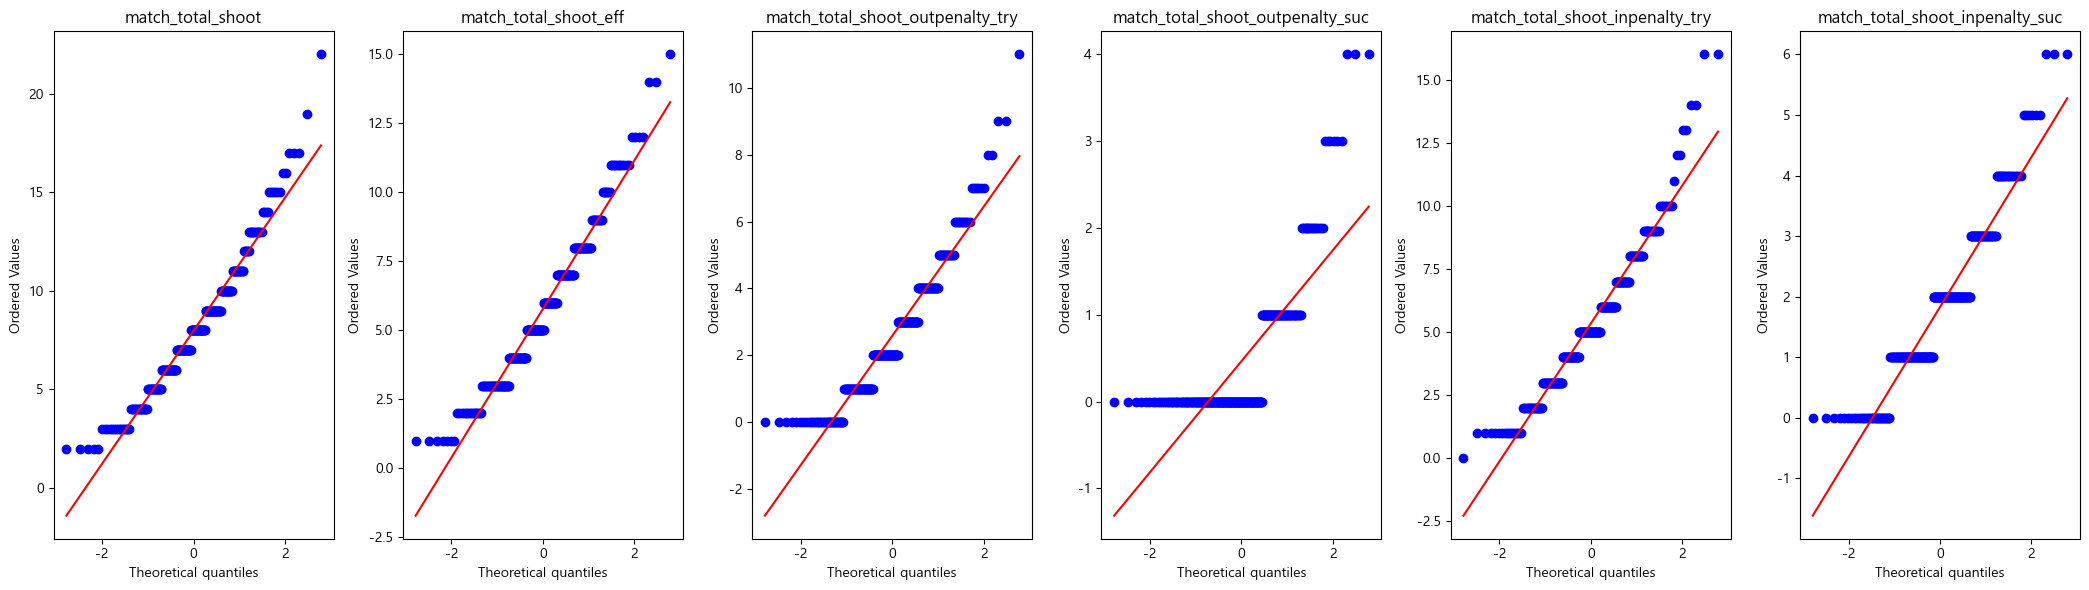

In [56]:
col_qqplot_all(df3, shoot_col)

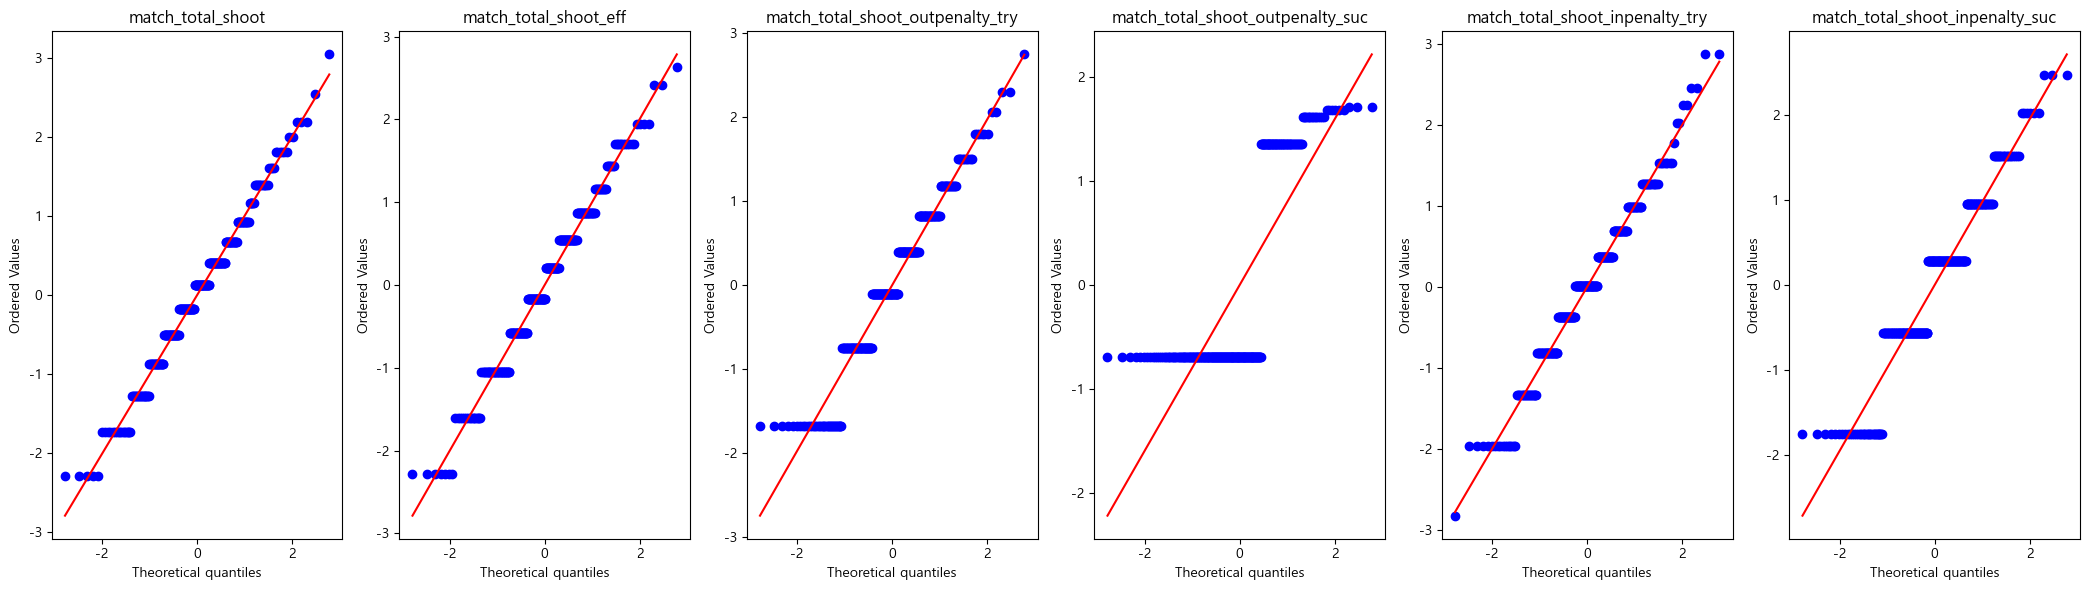

In [57]:
col_qqplot_norm_all(df3_qq, shoot_col)

In [58]:
df3_qq_win = df3_qq[df3_qq['match_result'] == '승']
df3_qq_lose = df3_qq[df3_qq['match_result'] == '패']

---

---

In [59]:
# 1. 정규성 검정 (Shapiro-Wilk test)
def normality_test(_df, _df_win, _df_lose, _columns):
    columns_normality_O = []
    columns_normality_X = []
    
    columns_homogeneity_O = []
    columns_homogeneity_X = []

    for col in _columns:
        stat_shap, p_val_shap = shapiro(_df[col])
        stat_win_shap, p_val_win_shap = shapiro(_df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(_df_lose[col])
        
        stat_kosm, p_val_kosm = kstest(_df[col], 'norm', args = (_df[col].mean(), _df[col].std()))
        stat_win_kosm, p_val_win_kosm = kstest(_df_win[col], 'norm', args = (_df_win[col].mean(), _df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(_df_lose[col], 'norm', args = (_df_lose[col].mean(), _df_lose[col].std()))
        
        stat, p_val = levene(_df_win[col], _df_lose[col])

        # print(f'{col} \n 정규성 검정: \n 전체: p-value={p_val_shap} \
        #                              \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
        #                              \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
        #                              \n Levene’s test p-value={p_val}')
              
        if p_val_shap > 0.05 or (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05):
            columns_normality_O.append(col) 

        else:
            if p_val_kosm > 0.05 or (p_val_win_kosm > 0.05 and p_val_lose_kosm) > 0.05:
                columns_normality_O.append(col)  

            else:
                columns_normality_X.append(col) 

        # 등분산성 검정 결과
        if p_val > 0.05:
            columns_homogeneity_O.append(col)  
            
        else:
            columns_homogeneity_X.append(col) 

    print('-----------------------------------------------------')
    print(f"정규분포 O: \n {', '.join(columns_normality_O)}")
    print('-----------------------------------------------------')
    print(f"정규분포 X: \n {', '.join(columns_normality_X)}")
    print('-----------------------------------------------------')
    print(f"등분산성 O: \n {', '.join(columns_homogeneity_O)}")
    print('-----------------------------------------------------')
    print(f"등분산성 X: \n {', '.join(columns_homogeneity_X)}")
    print('-----------------------------------------------------')

### 정규화 전 정규성, 등분산성 확인

In [60]:
normality_test(df3, df3_win, df3_lose, basic_col)

-----------------------------------------------------
정규분포 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_pass_suc
-----------------------------------------------------
정규분포 X: 
 match_total_goal, match_total_shoot
-----------------------------------------------------
등분산성 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
등분산성 X: 
 match_total_goal
-----------------------------------------------------


In [61]:
normality_test(df3, df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
정규분포 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
정규분포 X: 
 
-----------------------------------------------------
등분산성 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings
-----------------------------------------------------
등분산성 X: 
 goalkeeper_position_ratings
-----------------------------------------------------


In [62]:
normality_test(df3, df3_win, df3_lose, pass_col)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_through_suc
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try
-----------------------------------------------------
등분산성 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [63]:
normality_test(df3, df3_win, df3_lose, shoot_col)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_shoot, match_total_shoot_outpenalty_try
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_eff, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------


### 정규화 이후 정규성, 등분산성 확인

In [64]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, basic_col)

-----------------------------------------------------
정규분포 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
정규분포 X: 
 match_total_goal
-----------------------------------------------------
등분산성 O: 
 match_possession, match_avg_rating, match_total_dribble, match_total_goal, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [65]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, position_ratings_col)

-----------------------------------------------------
정규분포 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
정규분포 X: 
 
-----------------------------------------------------
등분산성 O: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [66]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, pass_col)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_try, match_total_pass_long_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
등분산성 X: 
 
-----------------------------------------------------


In [67]:
normality_test(df3_qq, df3_qq_win, df3_qq_lose, shoot_col)

-----------------------------------------------------
정규분포 O: 
 match_total_shoot, match_total_shoot_eff
-----------------------------------------------------
정규분포 X: 
 match_total_shoot_outpenalty_try, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_outpenalty_suc
-----------------------------------------------------


In [68]:
def group_difference_test(_df_win, _df_lose, _columns):
    for col in _columns:
        # 정규성 여부에 따라 검정 방법 선택
        stat_win_shap, p_val_win_shap = shapiro(_df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(_df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(_df_win[col], 'norm', args = (_df_win[col].mean(), _df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(_df_lose[col], 'norm', args = (_df_lose[col].mean(), _df_lose[col].std()))
        
        if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
            stat, p_val = ttest_ind(_df_win[col], _df_lose[col], equal_var = True)  
            test_type = "t-test"
            
        else:  # 정규분포를 따르지 않을 경우
            stat, p_val = mannwhitneyu(_df_win[col], _df_lose[col])
            test_type = "Mann-Whitney U test"
        
        print('-----------------------------------------------------')

        if p_val < 0.05:
            print(f'{col}은(는) 승패에 따라 유의미한 차이가 있음')
        else:
            print(f'{col}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

In [69]:
group_difference_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_avg_rating은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_dribble은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX


In [70]:
group_difference_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
attack_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
middle_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
defense_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음


In [71]:
group_difference_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_eff은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


In [72]:
group_difference_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
match_total_pass_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX


---

In [73]:
list(df2_temp.columns)

['match_total_pass_short_suc',
 'match_total_pass_long_suc',
 'match_total_pass_through_try',
 'match_total_shoot_outpenalty_try',
 'match_total_shoot_outpenalty_suc',
 'match_total_shoot_inpenalty_try',
 'match_total_shoot_inpenalty_suc']

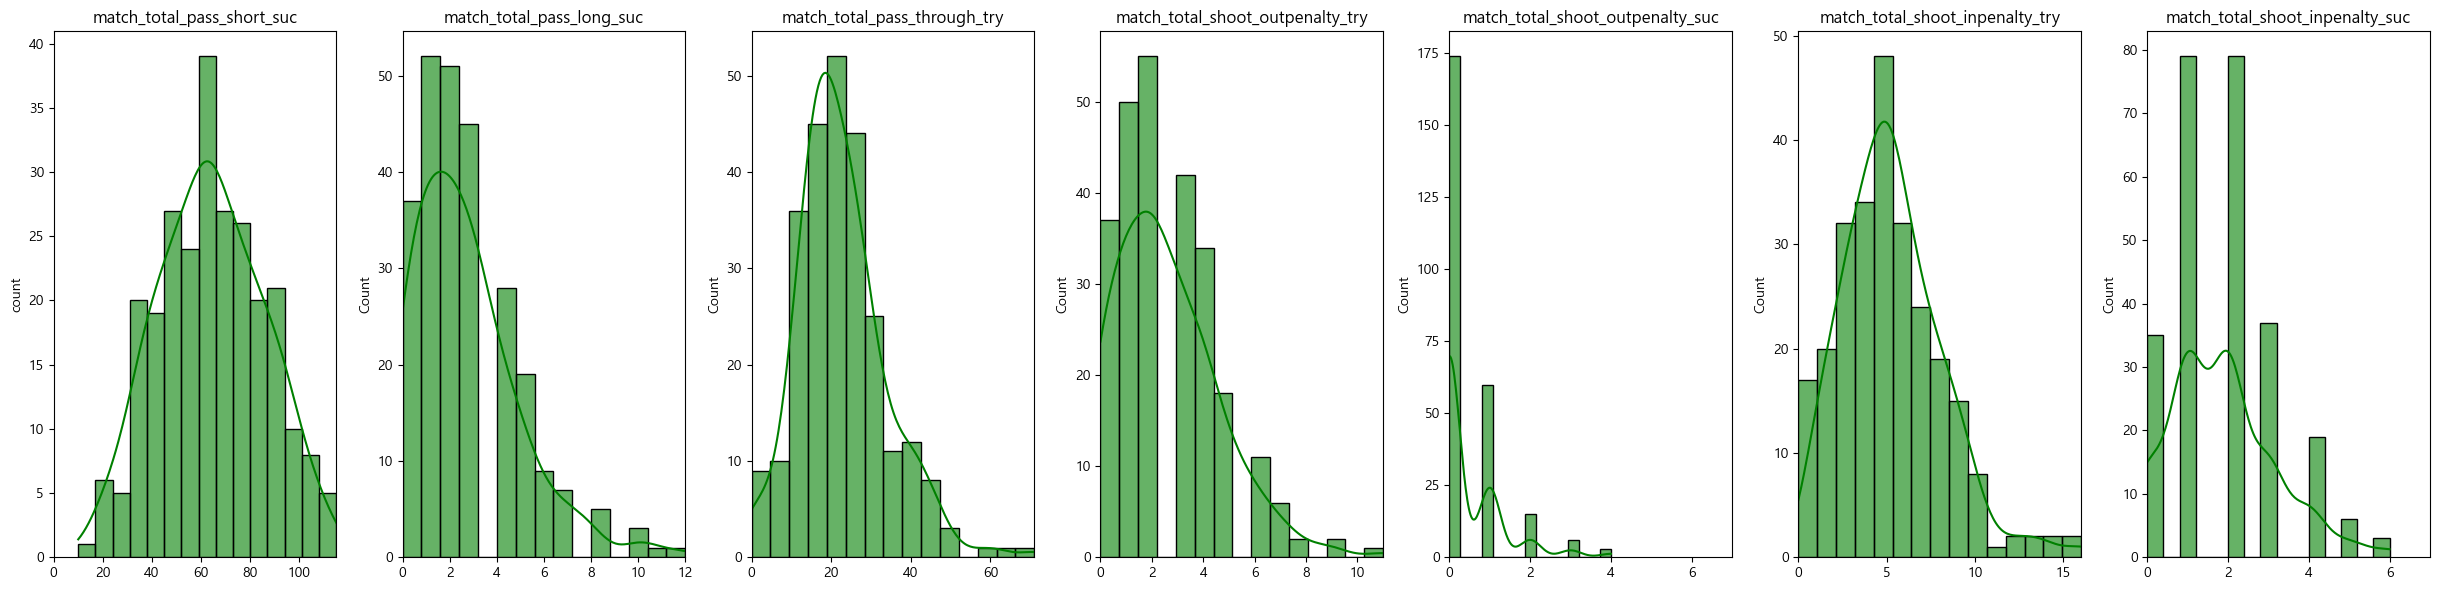

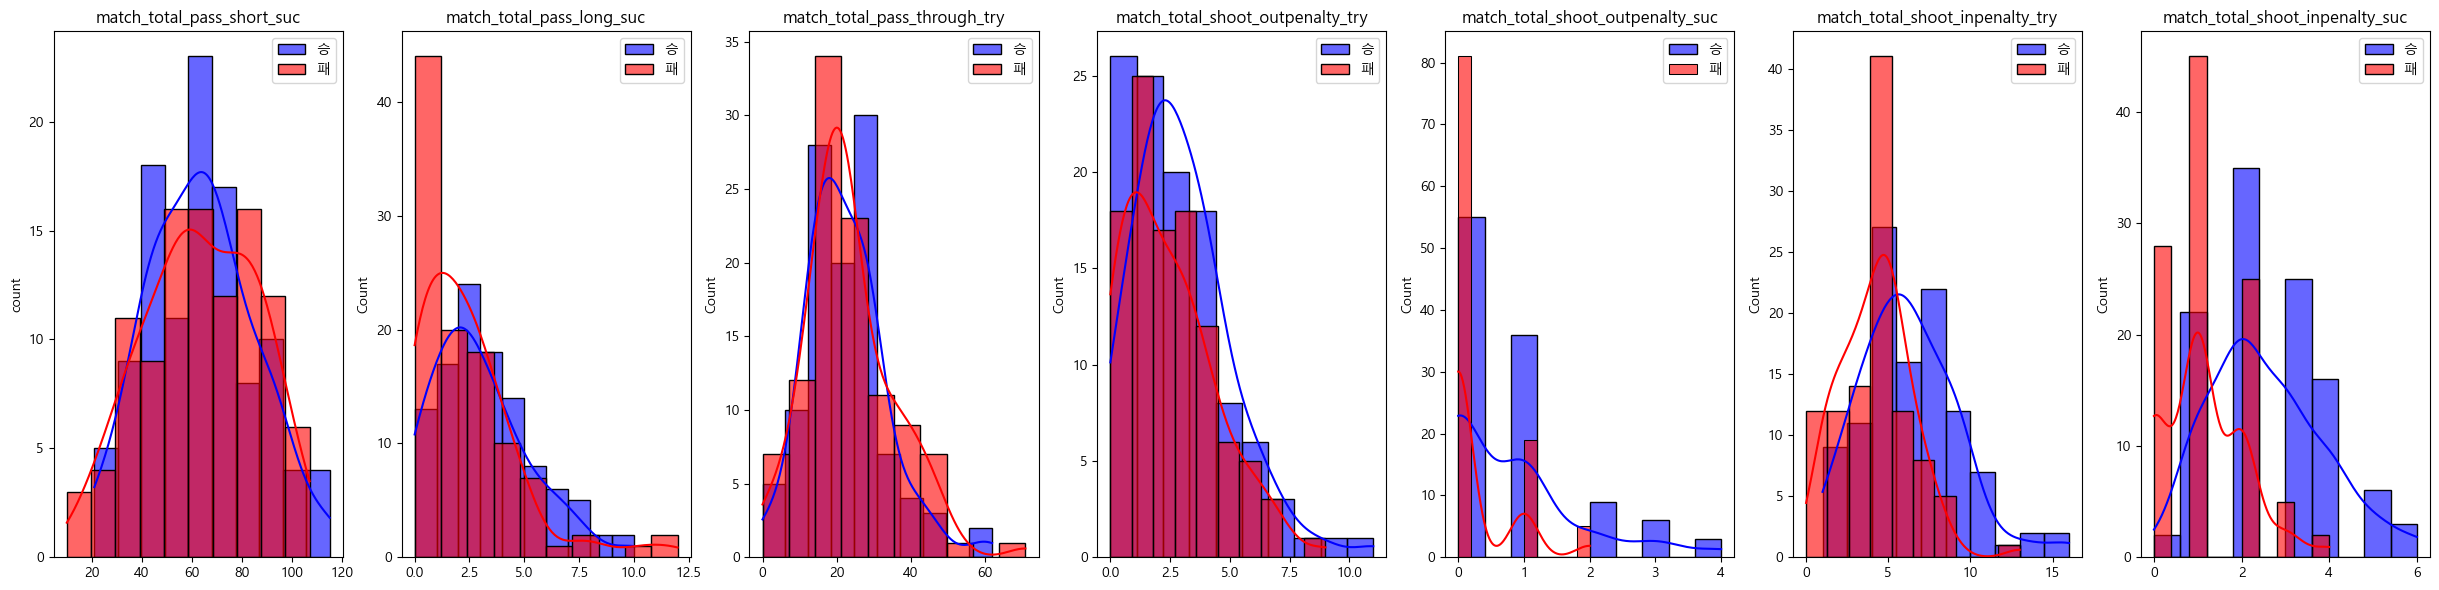

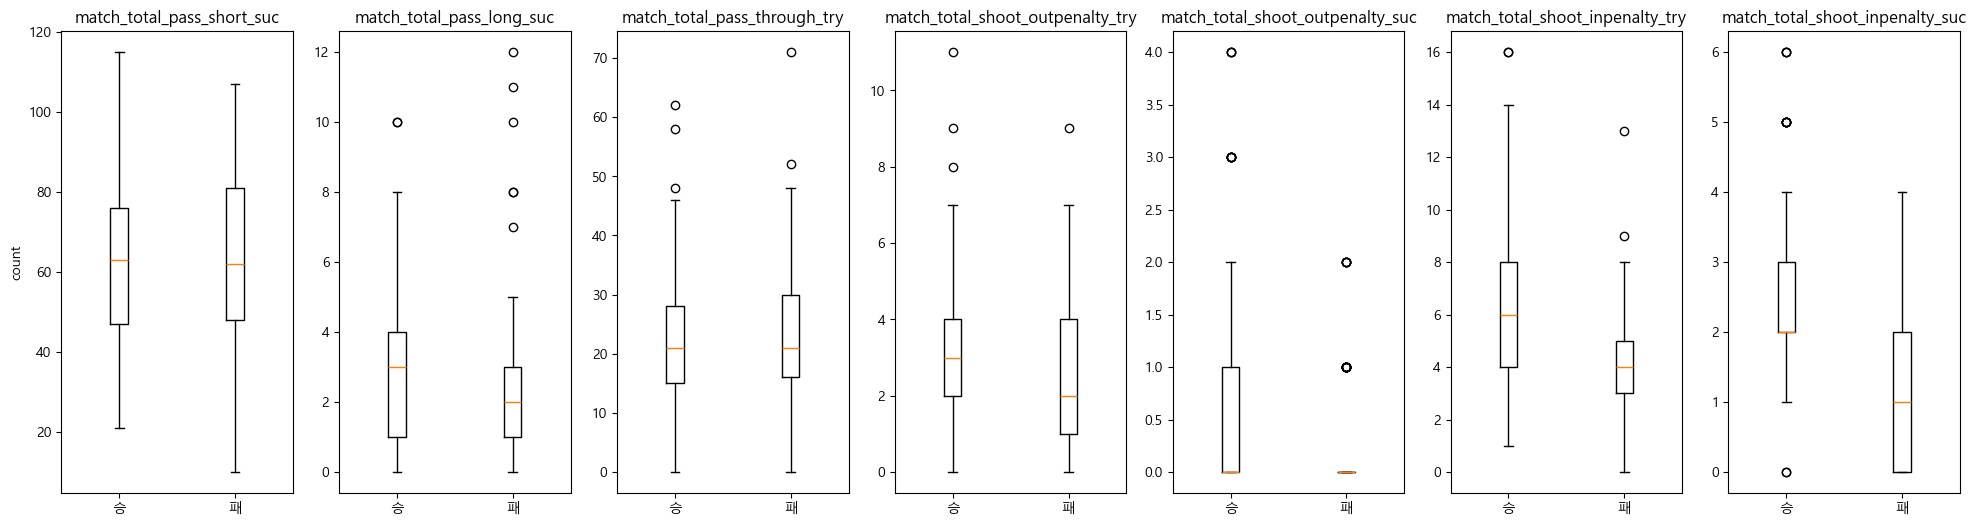

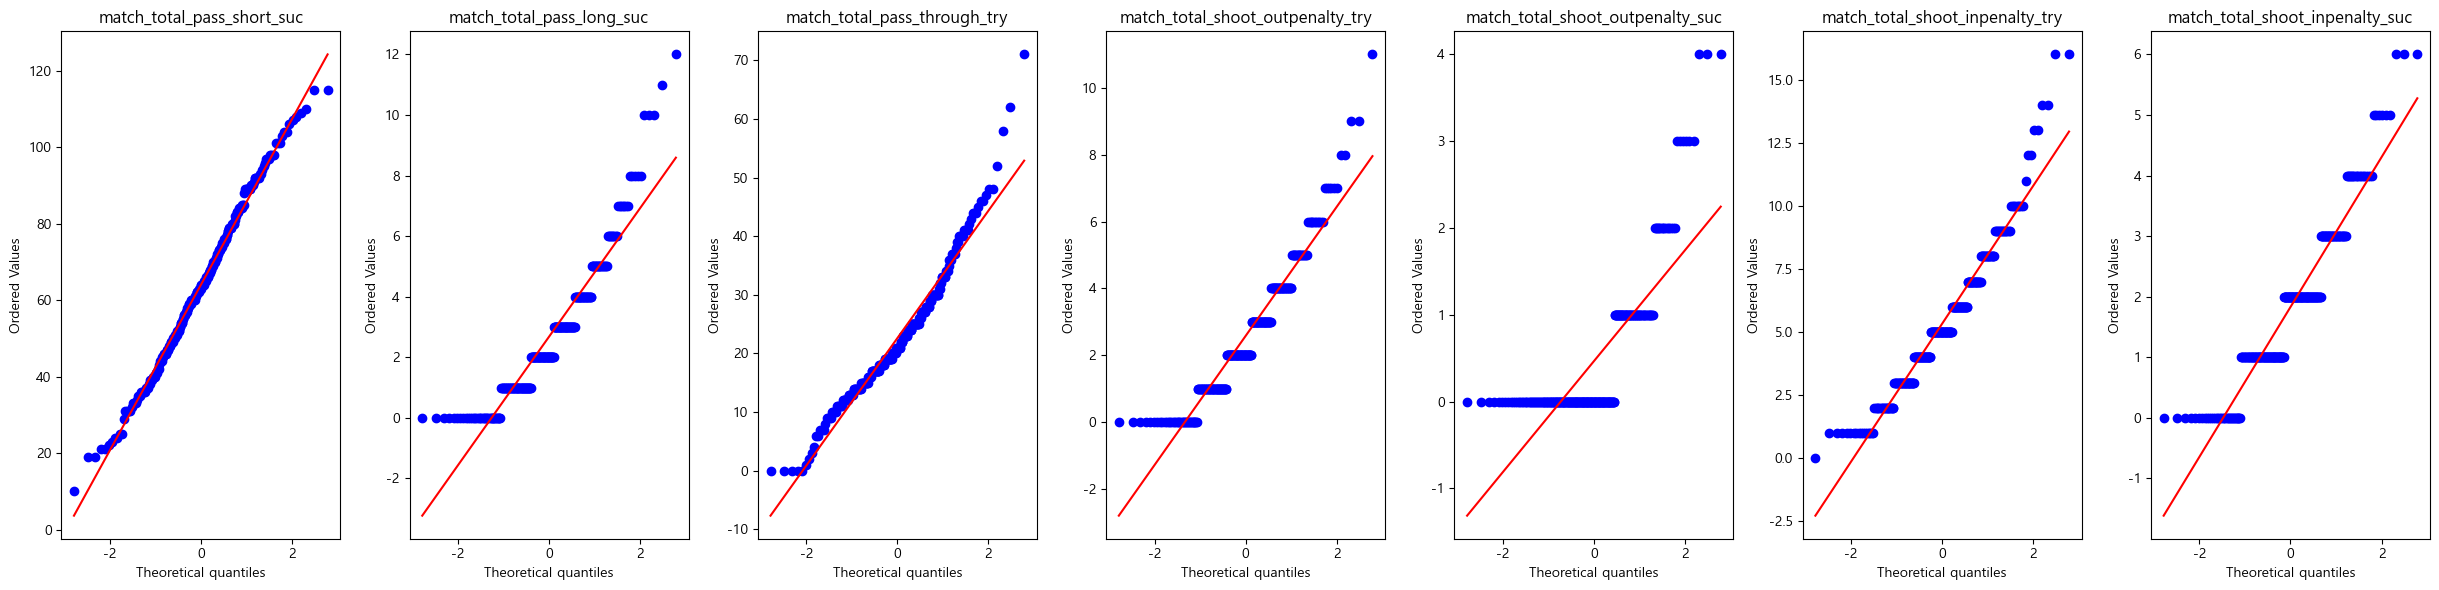

In [74]:
df4 = df1[['match_result'] + list(df2_temp.columns)]

df4_win = df4[df4['match_result'] == '승']
df4_lose = df4[df4['match_result'] == '패']

df4_temp = df4.drop(columns = ['match_result'])

col_hist_all(df4_temp, df4_temp.columns);
col_hist(df4_win, df4_lose, df4_temp.columns);
col_boxplot(df4_win, df4_lose, df4_temp.columns, False);
col_qqplot_all(df4_temp, df4_temp.columns);

In [228]:
normality_test(df4, df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
정규분포 O: 
 match_total_pass_short_suc, match_total_pass_through_try, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------
정규분포 X: 
 match_total_pass_long_suc, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_short_suc, match_total_pass_long_suc, match_total_pass_through_try, match_total_shoot_outpenalty_try
-----------------------------------------------------
등분산성 X: 
 match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------


In [229]:
group_difference_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


---

# PRACTICE

In [62]:
# match_total_goal, match_possession, match_total_shoot_inpenalty_try, 
# match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try
# match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try

column_name = 'match_total_shoot_inpenalty_try'

temp_query = f"SELECT match_result, {column_name} FROM match_user;"
df_temp = pd.read_sql(temp_query, con = engine);

df_temp[column_name] += 0.1
df_temp[f'{column_name}_boxcox'] = stats.boxcox(df_temp[column_name])[0] 

x = df_temp[column_name]
x_win = df_temp[df_temp['match_result'] == '승'][column_name]
x_lose = df_temp[df_temp['match_result'] == '패'][column_name]

y = df_temp[f'{column_name}_boxcox'] 
y_win = df_temp[df_temp['match_result'] == '승'][f'{column_name}_boxcox'] 
y_lose = df_temp[df_temp['match_result'] == '패'][f'{column_name}_boxcox'] 

2024-12-19 19:37:48,316 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:48,317 INFO sqlalchemy.engine.Engine [cached since 23.27s ago] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;'}
2024-12-19 19:37:48,319 INFO sqlalchemy.engine.Engine SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;
2024-12-19 19:37:48,320 INFO sqlalchemy.engine.Engine [raw sql] {}


In [63]:
print(shapiro(x))
print(kstest(x, 'norm', args=(x.mean(), x.std())))

if shapiro(x).pvalue > 0.05 :
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if kstest(x, 'norm', args=(x.mean(), x.std())).pvalue > 0.05 : 
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_win))
print(kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())))

if shapiro(x_win).pvalue > 0.05 :
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())).pvalue > 0.05 : 
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_lose))
print(kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())))

if shapiro(x_lose).pvalue > 0.05 :
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())).pvalue > 0.05 : 
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
stat_win_shap, p_val_win_shap = shapiro(y_win)
stat_lose_shap, p_val_lose_shap = shapiro(y_lose)

stat_win_kosm, p_val_win_kosm = kstest(y_win, 'norm', args=(y_win.mean(), y_win.std()))
stat_lose_kosm, p_val_lose_kosm = kstest(y_lose, 'norm', args=(y_lose.mean(), y_lose.std()))

stat, p_val = levene(y_win, y_lose)

print(f'{column_name} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                \n Levene’s test p-value={p_val}')

if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

if p_val > 0.05:
    print(f'{column_name}은(는) 등분산을 따른다고 볼 수 있음')
else:
    print(f'{column_name}은(는) 등분산을 따르지 않음')

if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05): 
    stat, p_val = ttest_ind(y_win, y_lose, equal_var=True)
    test_type = "t-test"
    
else:  
    stat, p_val = mannwhitneyu(y_win, y_lose)
    test_type = "Mann-Whitney U test"

if p_val < 0.05:
    print(f'{column_name}은(는) 승패에 따라 유의미한 차이가 있음')
else:
    print(f'{column_name}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

ShapiroResult(statistic=0.6068821114896326, pvalue=1.6693034088821562e-62)
KstestResult(statistic=0.26226460879254326, pvalue=9.828532862056203e-173, statistic_location=0.1, statistic_sign=-1)
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6597235089040101, pvalue=1.1865033090730458e-47)
KstestResult(statistic=0.21875897799363542, pvalue=8.344331102622533e-64, statistic_location=3.1, statistic_sign=1)
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6095004387681483, pvalue=1.3331822278179532e-47)
KstestResult(statistic=0.3993146539382591, pvalue=5.1681671625538594e-192, statistic_location=0.1, statistic_sign=1)
match_total_shoot_inpenalty_try_lose 은(는) 정규분포를 따르지 않음, _shap
match_tota

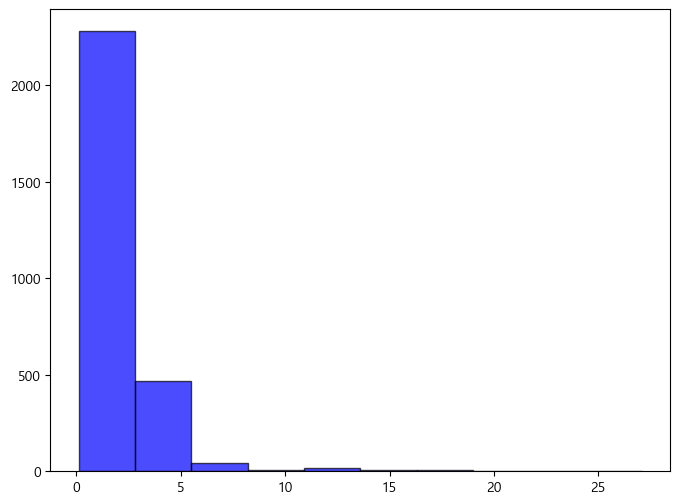

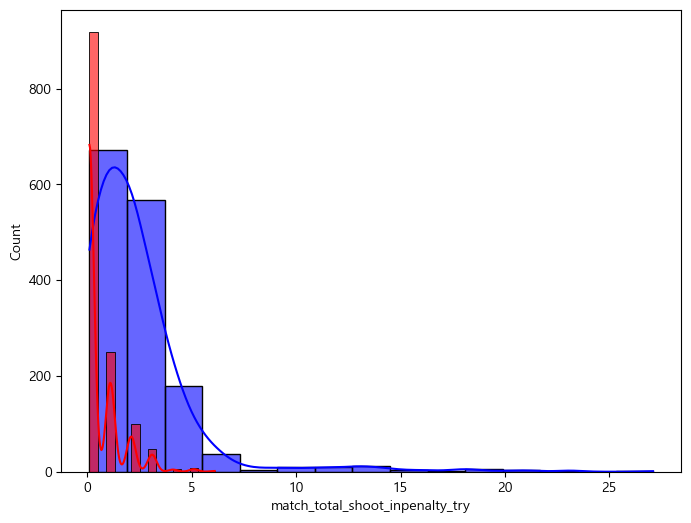

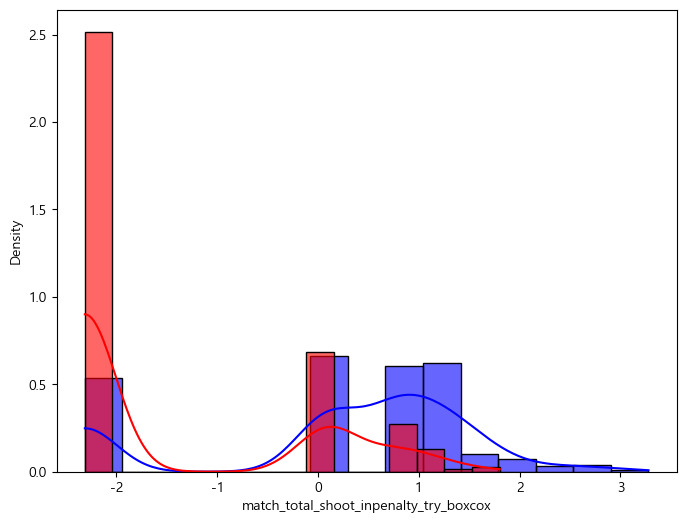

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))  

ax.hist(x, color='blue', alpha=0.7, edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(x_win, color='blue', bins = 15, kde=True, ax=ax, label='승', alpha=0.6);
sns.histplot(x_lose, color='red', bins = 15, kde=True, ax=ax, label='패', alpha=0.6);

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(y_win, color='blue', bins = 15, kde=True, ax=ax, label='승', stat="density", alpha=0.6);
sns.histplot(y_lose, color='red', bins = 15, kde=True, ax=ax, label='패', stat="density", alpha=0.6);

---

In [133]:
df3_position_temp = df3[['match_result'] + position_ratings_col].copy()

In [134]:
df3_position_temp = df3_position_temp[df3_position_temp['attack_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['middle_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['defense_position_ratings'] != 10]
df3_position_temp = df3_position_temp[df3_position_temp['goalkeeper_position_ratings'] != 10]

In [135]:
df3_position_temp_qq = df3_position_temp.copy()

In [136]:
df3_position_temp_win = df3_position_temp[df3_position_temp['match_result'] == '승']
df3_position_temp_lose = df3_position_temp[df3_position_temp['match_result'] == '패']

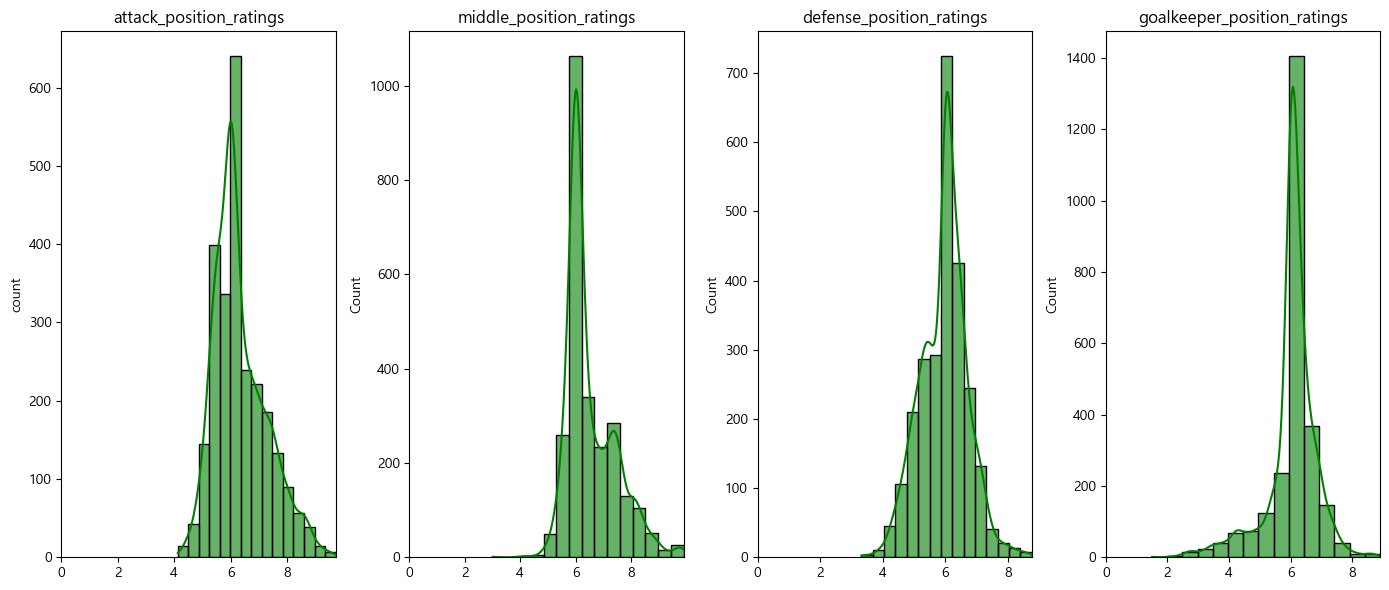

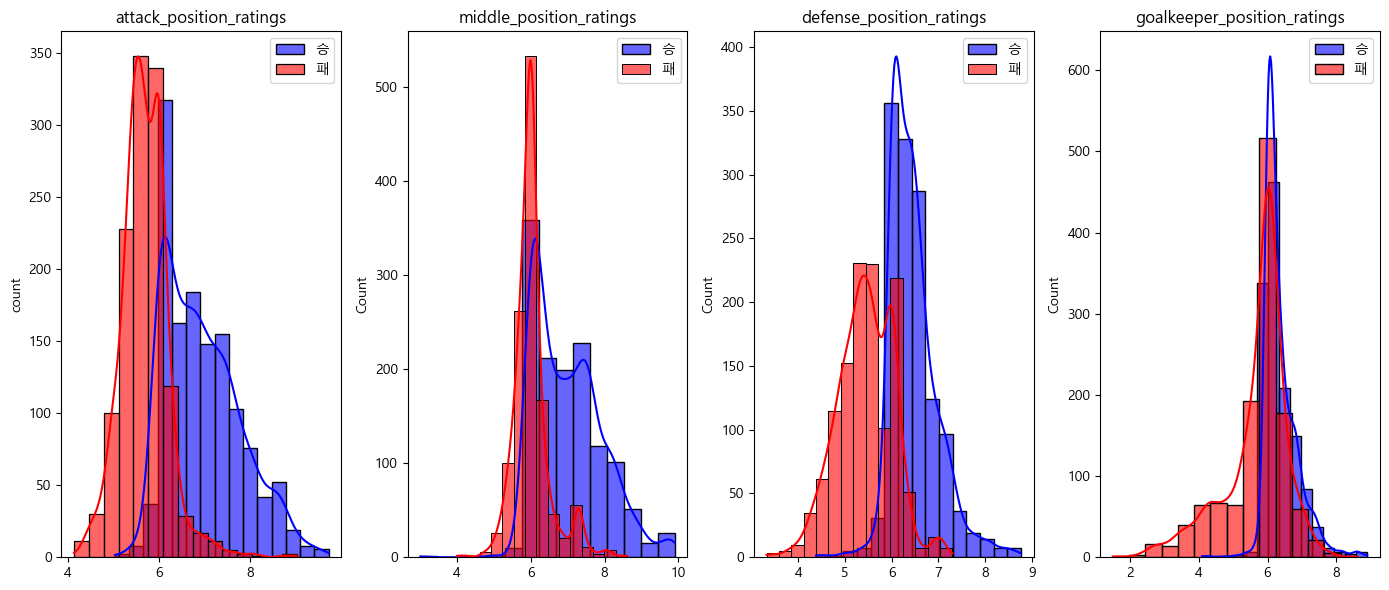

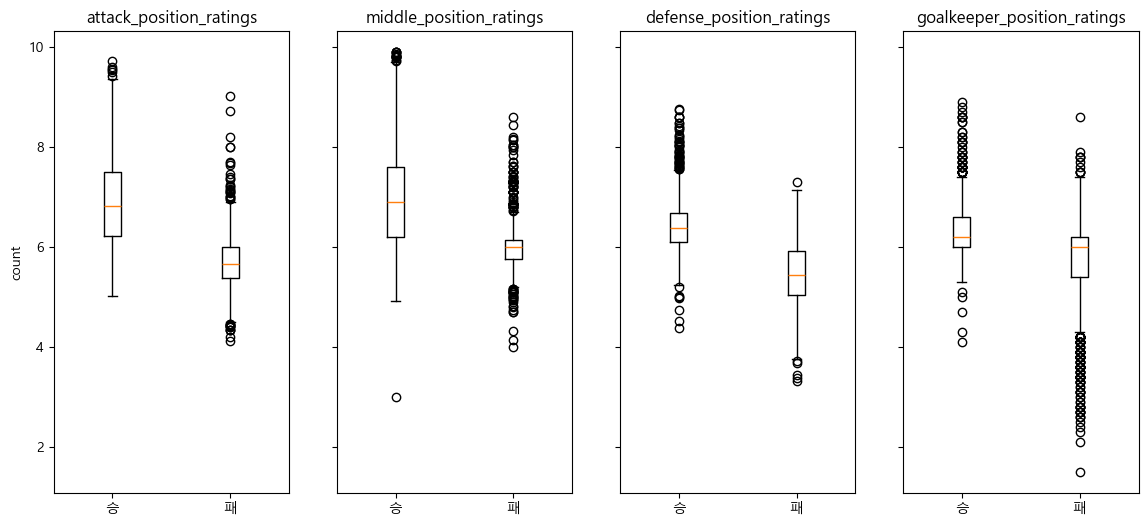

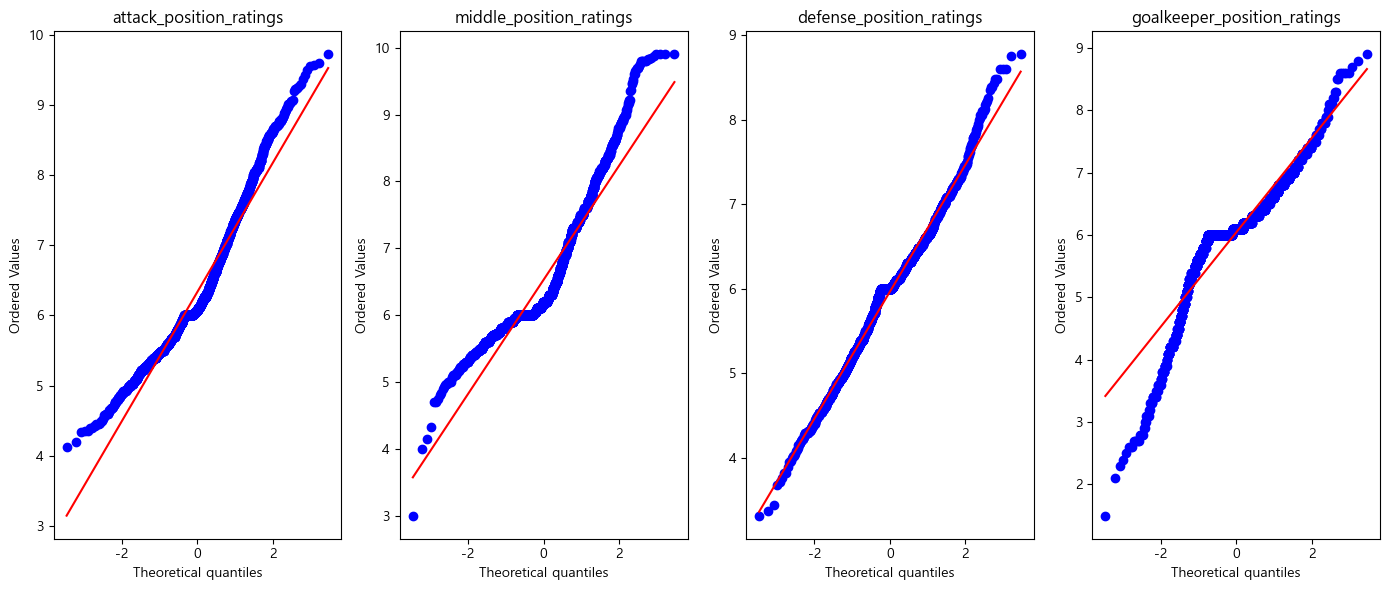

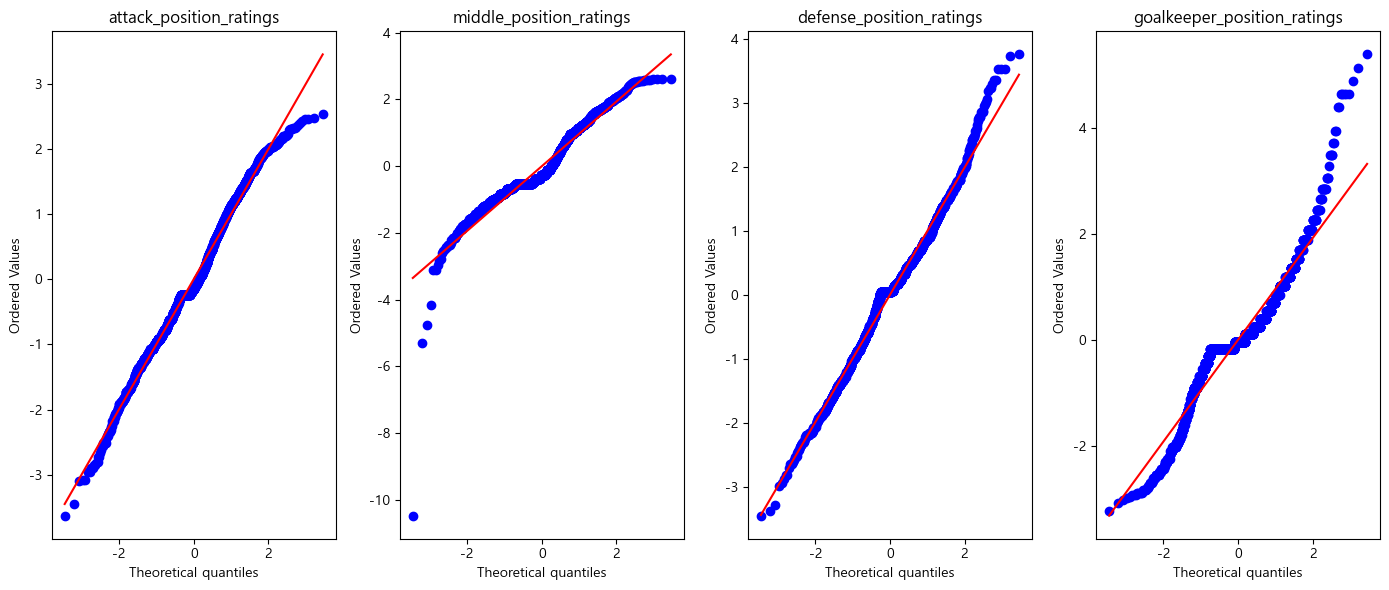

In [137]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);
col_boxplot(df3_position_temp_win, df3_position_temp_lose, position_ratings_col, True);
col_qqplot_all(df3_position_temp, position_ratings_col);
col_qqplot_norm_all(df3_position_temp_qq, position_ratings_col);

In [138]:
df3_position_temp_qq_win = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '승']
df3_position_temp_qq_lose = df3_position_temp_qq[df3_position_temp_qq['match_result'] == '패']

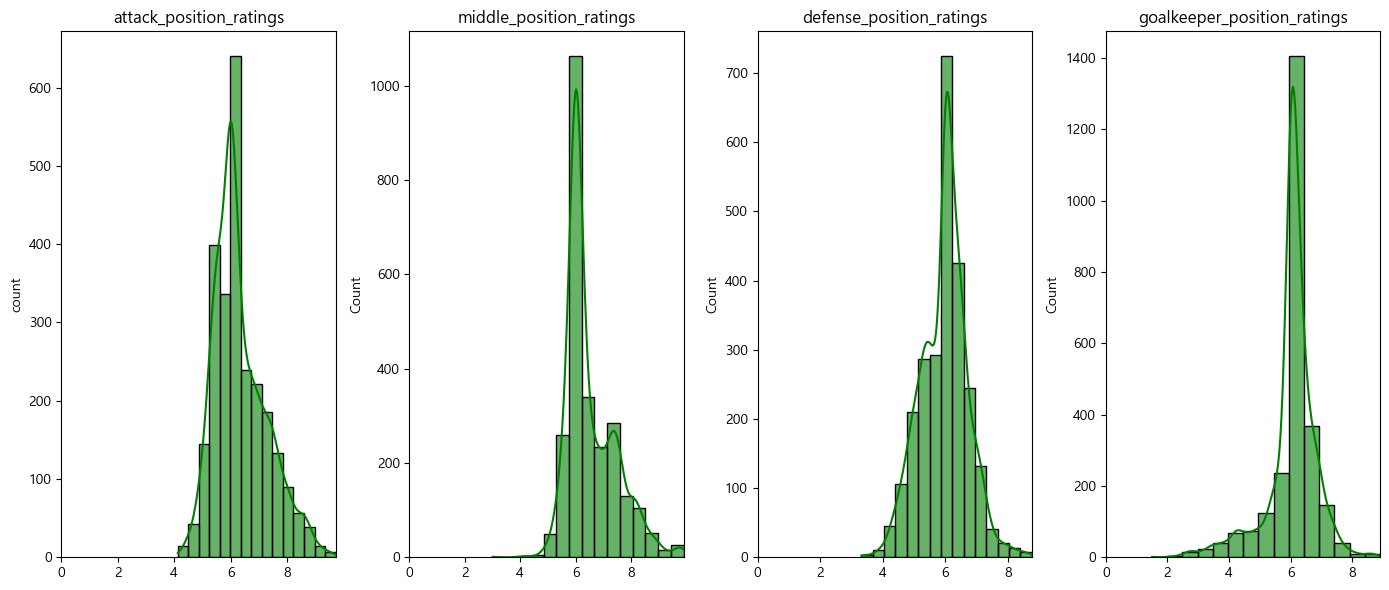

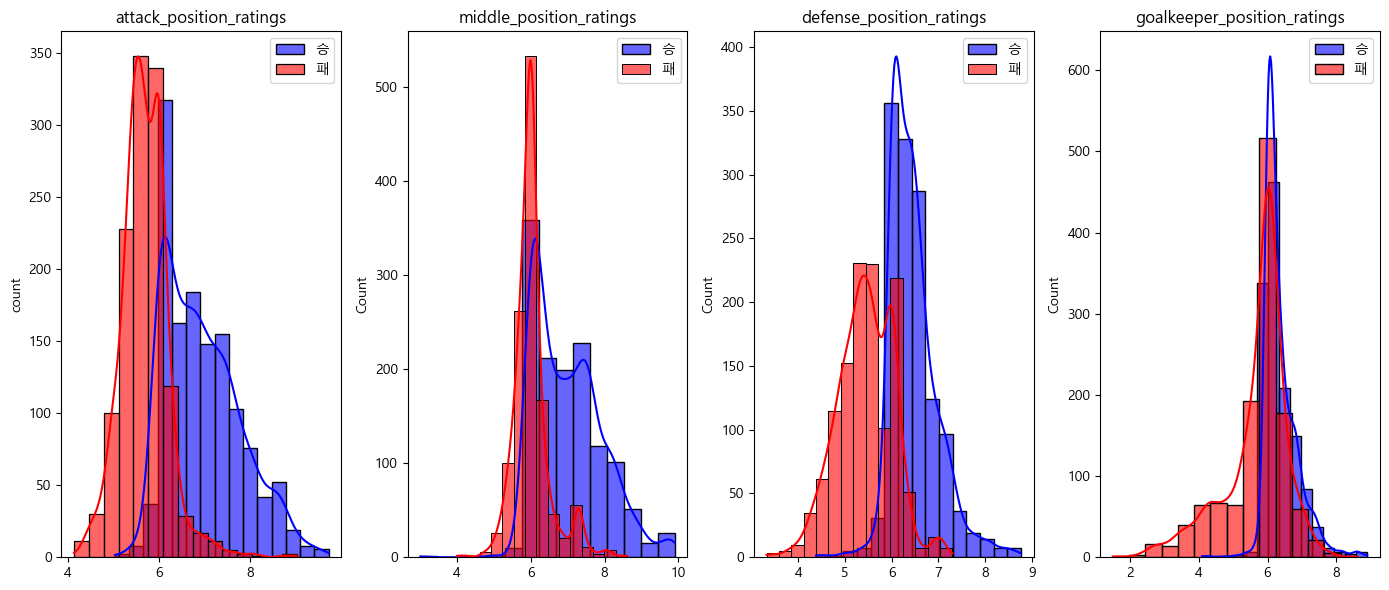

In [142]:
col_hist_all(df3_position_temp, position_ratings_col);
col_hist(df3_position_temp_win, df3_position_temp_lose, position_ratings_col);

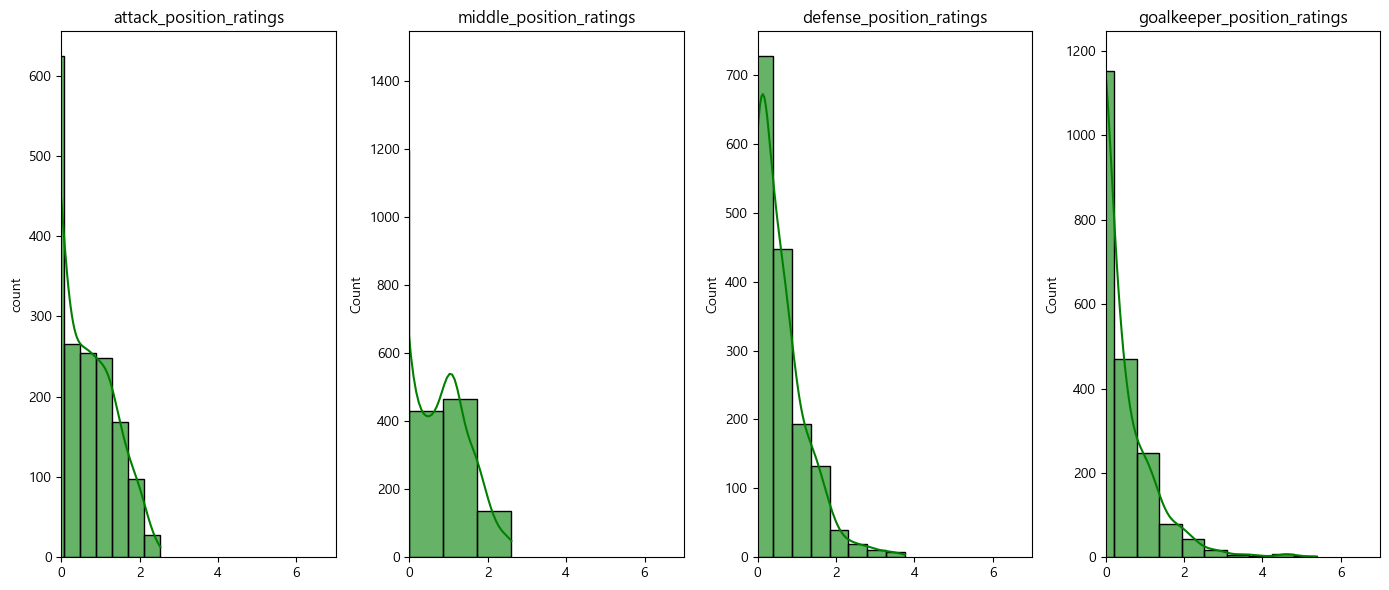

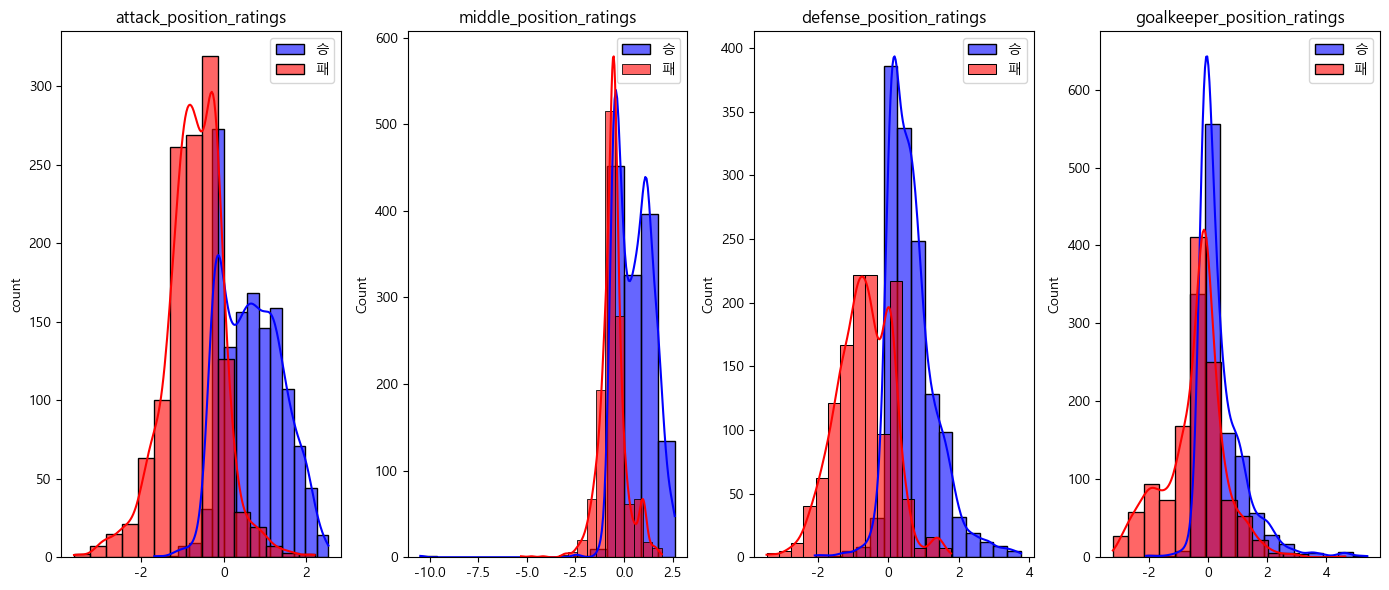

In [139]:
col_hist_all(df3_position_temp_qq, position_ratings_col);
col_hist(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col);

In [141]:
normality_test(df3_position_temp_win, df3_position_temp_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(2.779015395968604e-21, 4.018637369315889e-09)                       
 패: p-value=(1.170976428664024e-19, 6.744744358620897e-07)                       
 Levene’s test p-value=2.7809970904867556e-64
middle_position_ratings 
 승: p-value=(4.972674829823879e-24, 3.4884025857940325e-14)                       
 패: p-value=(5.114963007190142e-30, 3.96268071998687e-37)                       
 Levene’s test p-value=8.847980584628235e-113
defense_position_ratings 
 승: p-value=(3.017460847739262e-26, 2.094219461298858e-18)                       
 패: p-value=(1.8865756008367834e-07, 6.611621878220369e-05)                       
 Levene’s test p-value=3.2953285756175747e-10
goalkeeper_position_ratings 
 승: p-value=(2.443573851748739e-34, 9.020712999214966e-44)                       
 패: p-value=(3.7314025151496756e-28, 1.4031573410479406e-40)                       
 Levene’s test p-value=1.2158480815732963e-32
----------------------------------------------------

In [140]:
normality_test(df3_position_temp_qq_win, df3_position_temp_qq_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(3.823417749096195e-15, 4.069380587741458e-06)                       
 패: p-value=(1.1364816002355992e-13, 0.0002956723110489443)                       
 Levene’s test p-value=8.682348402672721e-07
middle_position_ratings 
 승: p-value=(1.6277782241423984e-27, 1.0500406019613864e-10)                       
 패: p-value=(4.896043935746978e-25, 1.7231384043306203e-22)                       
 Levene’s test p-value=2.380010404421132e-50
defense_position_ratings 
 승: p-value=(1.7586830480178728e-26, 1.5281133095701553e-18)                       
 패: p-value=(2.4207376831786177e-07, 6.486874846964313e-05)                       
 Levene’s test p-value=3.3182922646803644e-09
goalkeeper_position_ratings 
 승: p-value=(1.2374528540275727e-38, 1.127293664150749e-50)                       
 패: p-value=(3.9639578237195276e-19, 1.8056600170191988e-28)                       
 Levene’s test p-value=2.9000619550701555e-12
-----------------------------------------------